In [4]:
#%matplotlib inline
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams.update({'font.size': 22})
matplotlib.rcParams.update({'figure.autolayout': True})

# x = "GAGCTGGAGGCTTAGCAGGACCAAGAG"

In [ ]:
#len(x)

BAMS local

In [ ]:
%%bash
n=79170
#mkdir /home/genetix/Escritorio/coberturas/${n}
bedtools bamtobed -i /home/genetix/Escritorio/coberturas/${n}/${n}*.bam > /home/genetix/Escritorio/coberturas/${n}/${n}.bed
bedtools coverage -a /home/genetix/Escritorio/exons.bed -b /home/genetix/Escritorio/coberturas/${n}/${n}.bed -d -split > /home/genetix/Escritorio/coberturas/${n}/exon_$n.txt

BAM MiSEQ

In [ ]:
%%bash
n=78788
libreria='190917UB'
mkdir /home/genetix/Escritorio/coberturas/${n}
bedtools bamtobed -i /run/user/1000/gvfs/smb-share:server=qnap24tb.local,share=bioinformatica/CorridasTSO2019/${libreria}/${n}*.bam > /home/genetix/Escritorio/coberturas/${n}/${n}.bed
bedtools coverage -a /home/genetix/Escritorio/exons.bed -b /home/genetix/Escritorio/coberturas/${n}/${n}.bed -d -split > /home/genetix/Escritorio/coberturas/${n}/exon_$n.txt

##### BAM basespace

In [7]:
%%bash
#Codigo de muestra
n=79710
mkdir /home/genetix/Escritorio/coberturas/${n}
##cp /home/genetix/Documentos/${n}/GENES.txt /home/genetix/Escritorio/coberturas/${n} 
#Proyecto
p='27092019' 
bedtools bamtobed -i /home/genetix/BaseSpace_Mount/Projects/${p}/AppResults/${n}/Files/${n}*.bam > /home/genetix/Escritorio/coberturas/${n}/${n}.bed
bedtools coverage -a /home/genetix/Escritorio/exons.bed -b /home/genetix/Escritorio/coberturas/${n}/${n}.bed -d -split > /home/genetix/Escritorio/coberturas/${n}/exon_$n.txt

In [ ]:
#dfz = pd.read_csv('/home/genetix/Documentos/'+b+'/GENES.txt', sep ='\t')
#genes= dfz['Gene'].tolist()
#genes[0:10]

Copiar carpeta de genes

In [45]:
# print('Confirme el código del paciente:')
b= input()
a= pd.read_csv('/home/genetix/Documentos/'+b+'/GENES.txt',header= None) 
GENES= a[0].tolist()
d1 = pd.read_csv('/home/genetix/Escritorio/GenesNames_sort_uniq', header = None )
genes1 = d1[0].tolist()
#for i in range(len(genes1)):
 #   genes1[i] = '^' + genes1[i]
GENES = [GENES.strip(' ') for GENES in GENES]
p =list(set(GENES)-(set(genes1)))
p[0:50]

 79710


[]

In [ ]:
len(GENES)

In [77]:
#b ='73899'
df = pd.read_csv('/home/genetix/Escritorio/coberturas/'+b+'/exon_'+b+'.txt', names = ["chr", "Start", "End", "Exon", "Pos_exon","Cov"], sep='\t')

In [78]:
#x =  pd.read_table('/home/biolinux/Documentos/64561_exoma/marfan.txt')

In [79]:
df.head() 

,chr,Start,End,Exon,Pos_exon,Cov
0,chr1,35138,35174,FAM138A_3,1,56
1,chr1,35138,35174,FAM138A_3,2,56
2,chr1,35138,35174,FAM138A_3,3,56
3,chr1,35138,35174,FAM138A_3,4,58
4,chr1,35138,35174,FAM138A_3,5,57


In [80]:
dup= a[a[0].duplicated() == True]

In [81]:
len(dup)

0

In [82]:
a = a.drop_duplicates()

In [83]:
#df1 = pd.read_csv('GENES')

In [84]:
#genes = x['Gene'].tolist()

In [85]:
#df1 = pd.read_excel('VAR RETT 62260.xlsx',1, header = None)
#df1

In [86]:
#a = df1.columns.get_values()
#genes = list(a)

In [87]:
#genes[0:10]

In [88]:
genes = a[0].tolist()
genes[0:10]

['BRCA1',
 'BRCA2',
 'MLH1',
 'MSH2',
 'MSH6',
 'PMS2',
 'EPCAM',
 'APC',
 'MUTYH',
 'CDKN2A']

In [89]:
#genes = ['DNAH1','DNAH5']

In [90]:
#genes = df2[0].tolist()

In [91]:
#genes = ["FGFR2","COL1A1","COL1A2"]

In [92]:
genes = [genes.strip(' ') for genes in genes]

In [93]:
for i in range(len(genes)):
    genes[i] = '^' + genes[i]

In [94]:
genes[0:5]

['^BRCA1', '^BRCA2', '^MLH1', '^MSH2', '^MSH6']

In [95]:
#genes = ['BMP1','COL1A1','COL1A2','CRTAP','FKBP10','IFITM5','LAMB3','LEPRE1','PPIB','SERPINF1','SERPINH1','SP7']
genes_ = '_,'.join(map(str, genes))
g = genes_.split(',')
g[-1] = g[-1]+'_'

In [96]:
len(g)

28

In [97]:
g[0:10]

['^BRCA1_',
 '^BRCA2_',
 '^MLH1_',
 '^MSH2_',
 '^MSH6_',
 '^PMS2_',
 '^EPCAM_',
 '^APC_',
 '^MUTYH_',
 '^CDKN2A_']

In [98]:
#todos = df[df['Exon'].str.contains('^RPGR_')]

In [99]:
todos = df[df['Exon'].str.contains('|'.join(g))]

In [100]:
todos = todos.assign(Cov2 = todos.Cov.astype(bool))

In [101]:
#todos['Cov2']= todos.Cov2.astype(int)
todos.Cov2 = todos.Cov2.astype(int)

In [102]:
todos.head()

,chr,Start,End,Exon,Pos_exon,Cov,Cov2
1003321,chr1,45794978,45795109,MUTYH_16,1,66,1
1003322,chr1,45794978,45795109,MUTYH_16,2,66,1
1003323,chr1,45794978,45795109,MUTYH_16,3,66,1
1003324,chr1,45794978,45795109,MUTYH_16,4,66,1
1003325,chr1,45794978,45795109,MUTYH_16,5,66,1


In [103]:
#todos.to_csv('prueba.txt', sep ='\t')

In [104]:
def grafico_media(m):
    x = todos[todos['Exon'].str.contains(m)]
    x1 = x[['Cov','Exon']].groupby('Exon').mean()
    x2 = x1.sort_values('Cov', ascending= True)
    plot = x2.plot(kind="bar",figsize=(20, 10), title = m , color = [('#41b9e1')]);plt.axhline(20, color='k');
    fig = plot.get_figure()
    fig.savefig('/home/genetix/Escritorio/coberturas/'+b+'/'+m+".png", bbox_inches=0)
    return x2

In [105]:
def porcentaje_cobertura(l):
    s = todos[todos['Exon'].str.contains(l)]
    s_1 = s[['Cov2','Exon']].groupby('Exon').mean()*100
    y1 = s_1.sort_values('Cov2', ascending= True)
    plot = y1.plot(kind="bar",figsize=(20, 10), title = l ,color = [('#6633FF')]);plt.axhline(100, color='r');
    fig = plot.get_figure()
    plot.set(xlabel="Exon", ylabel="Porcentaje de Cobertura")
    fig.savefig('/home/genetix/Escritorio/coberturas/'+b+'/'+l+ "P.png", bbox_inches=0)
    return y1

In [106]:
def profundidad(c):
    z = todos[todos['Exon'].str.contains('(?:\\s|^)'+c+'(?:\\s|$)')]
    plt.figure(figsize=(20,10))
    z.plot(kind='area', x='Pos_exon', y='Cov',figsize=(40, 10),title = c ,color = [('#088A08')]);plt.axhline(10, color='r');plt.axhline(30, color='k')
    plt.xlim(left=1)
    plt.savefig('/home/genetix/Escritorio/coberturas/'+b+'/'+c+'.png', bbox_inches=None , pad_inches=0)
    return z

In [107]:
#T = todos[todos['Exon'].str.contains('(?:\\s|^)SHOX_5_chrY(?:\\s|$)')]

In [38]:
#genes

In [39]:
#a = todos[todos['Exon'].str.contains('SHOX_5_chrY')]
#a.to_csv('example.csv', index=False)

/home/genetix/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


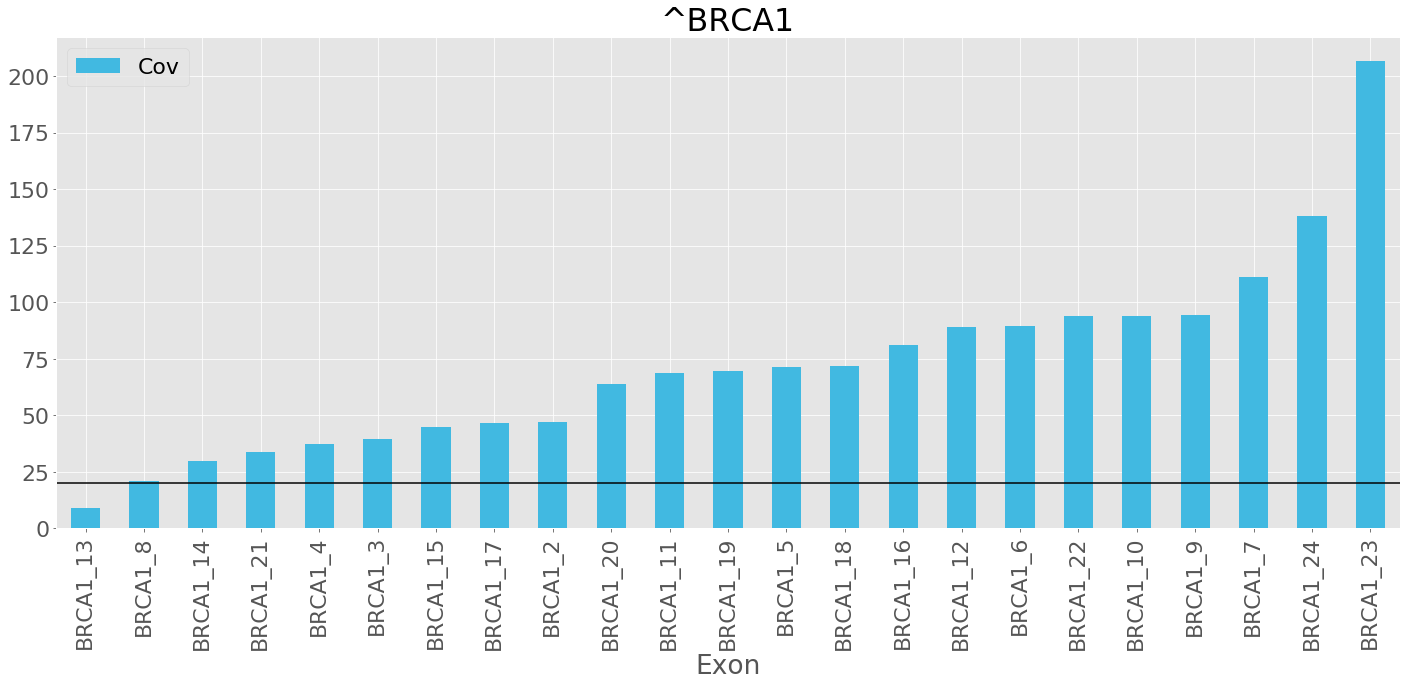

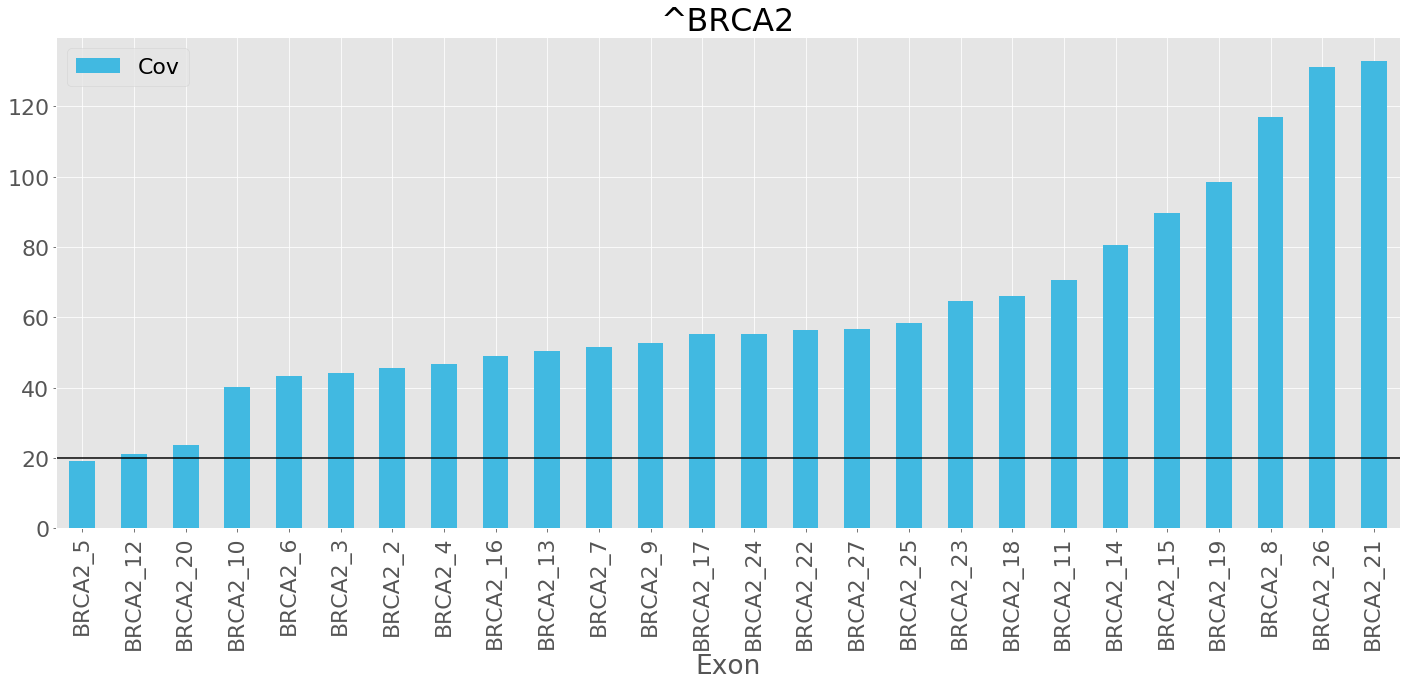

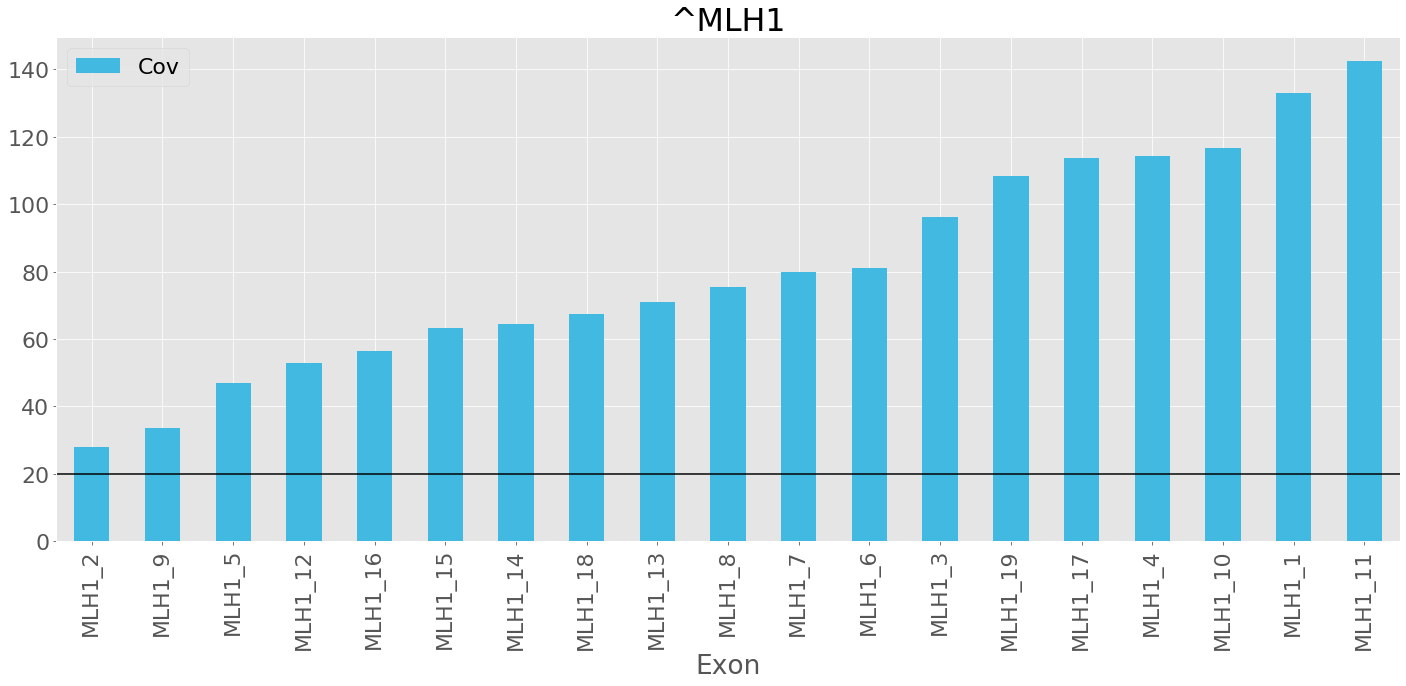

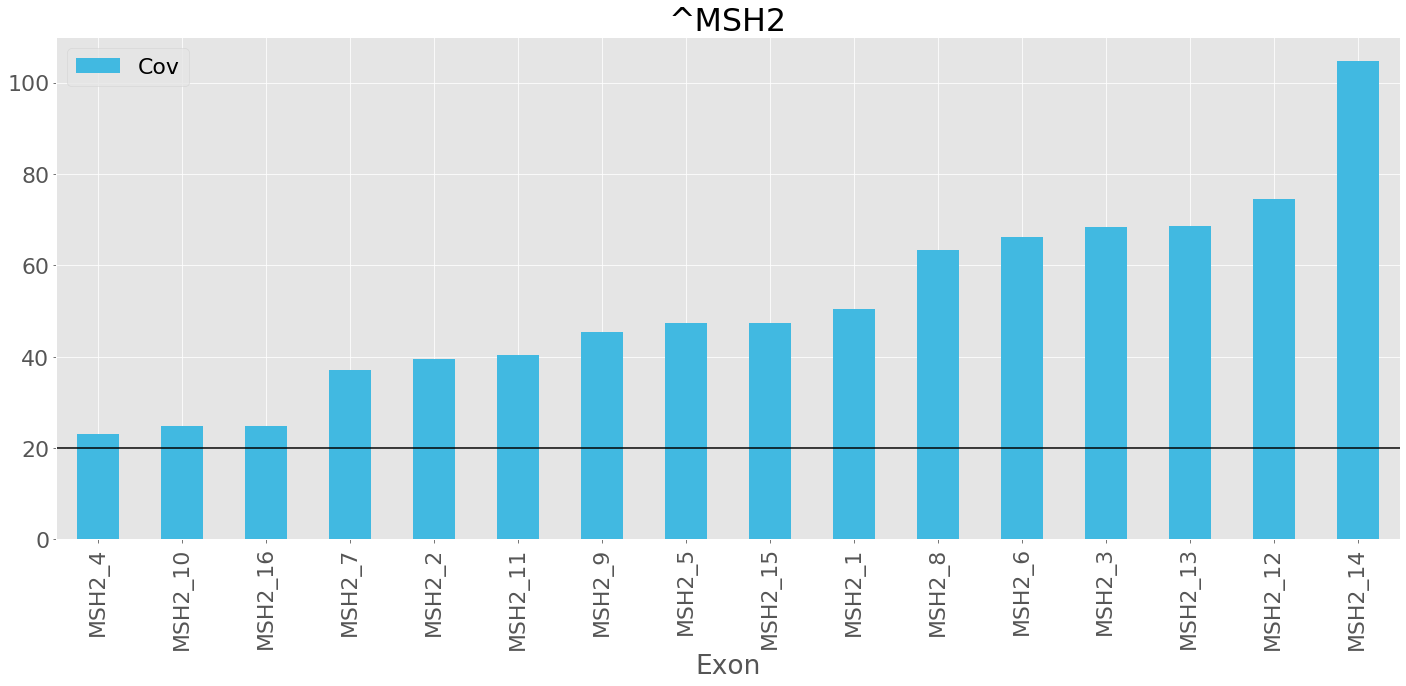

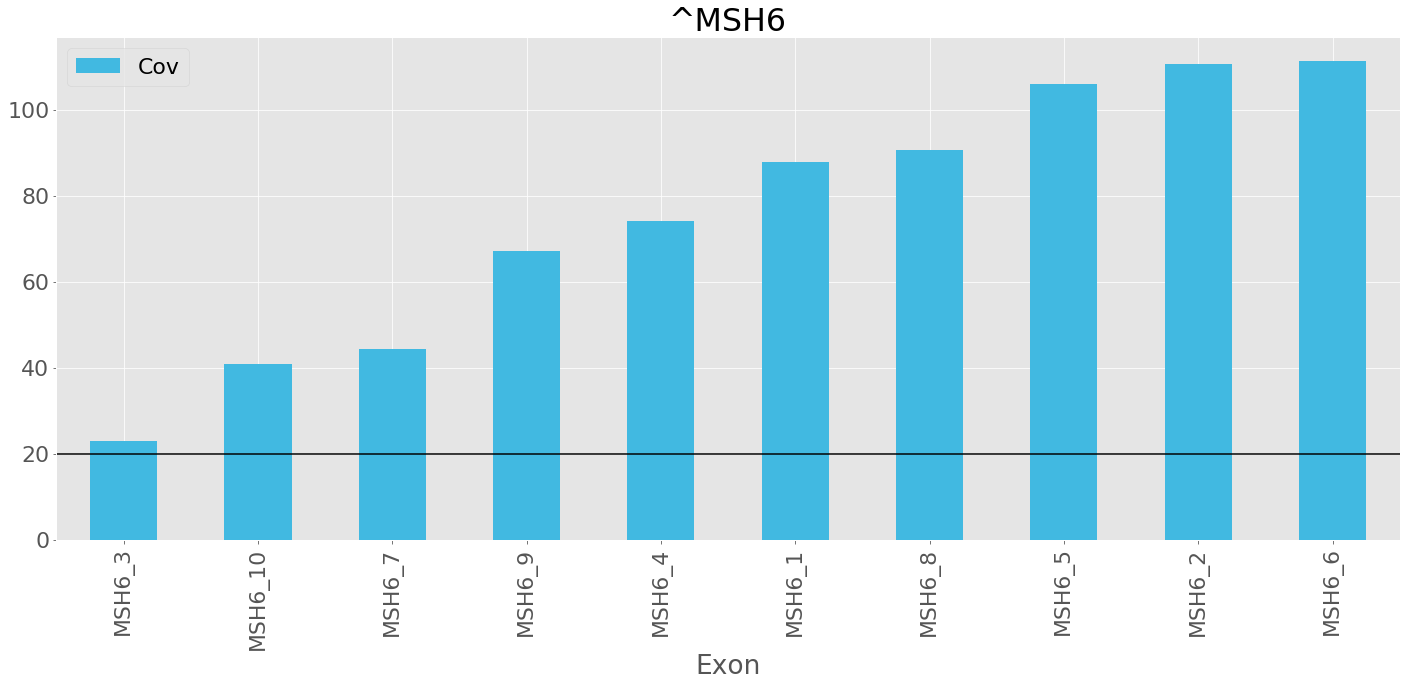

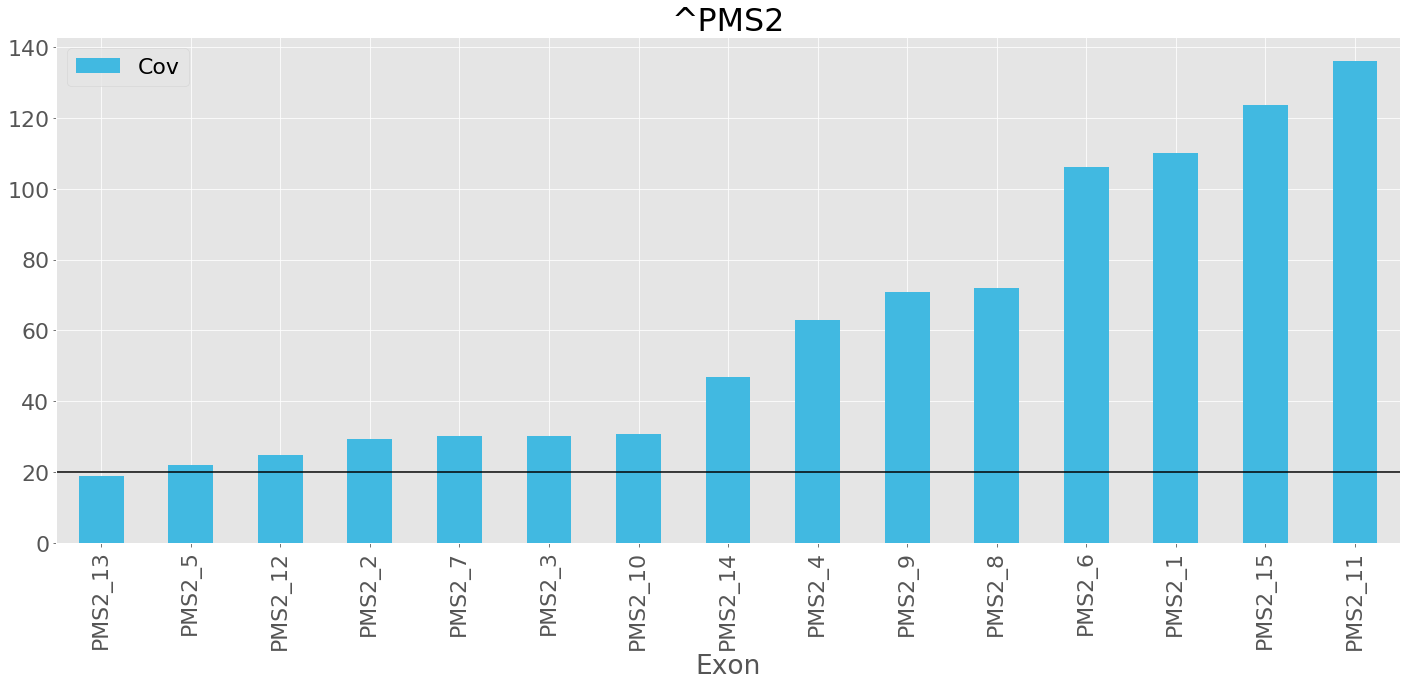

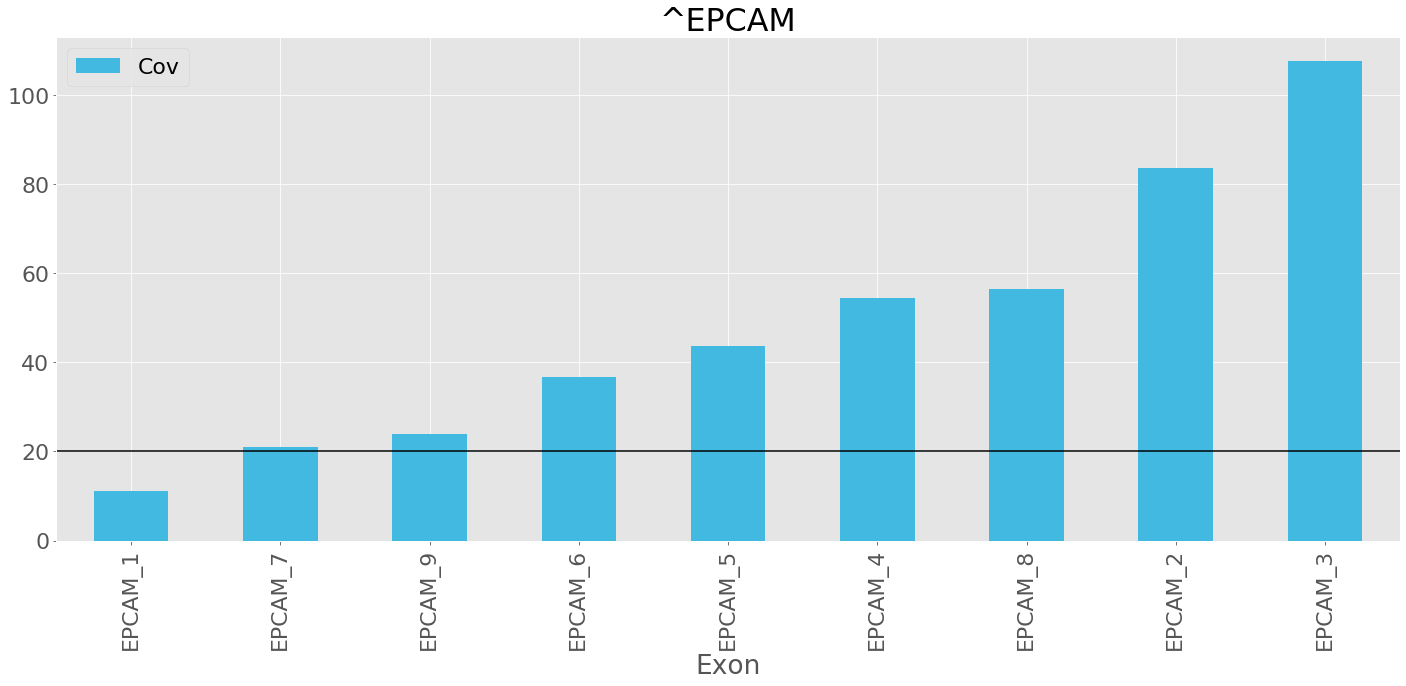

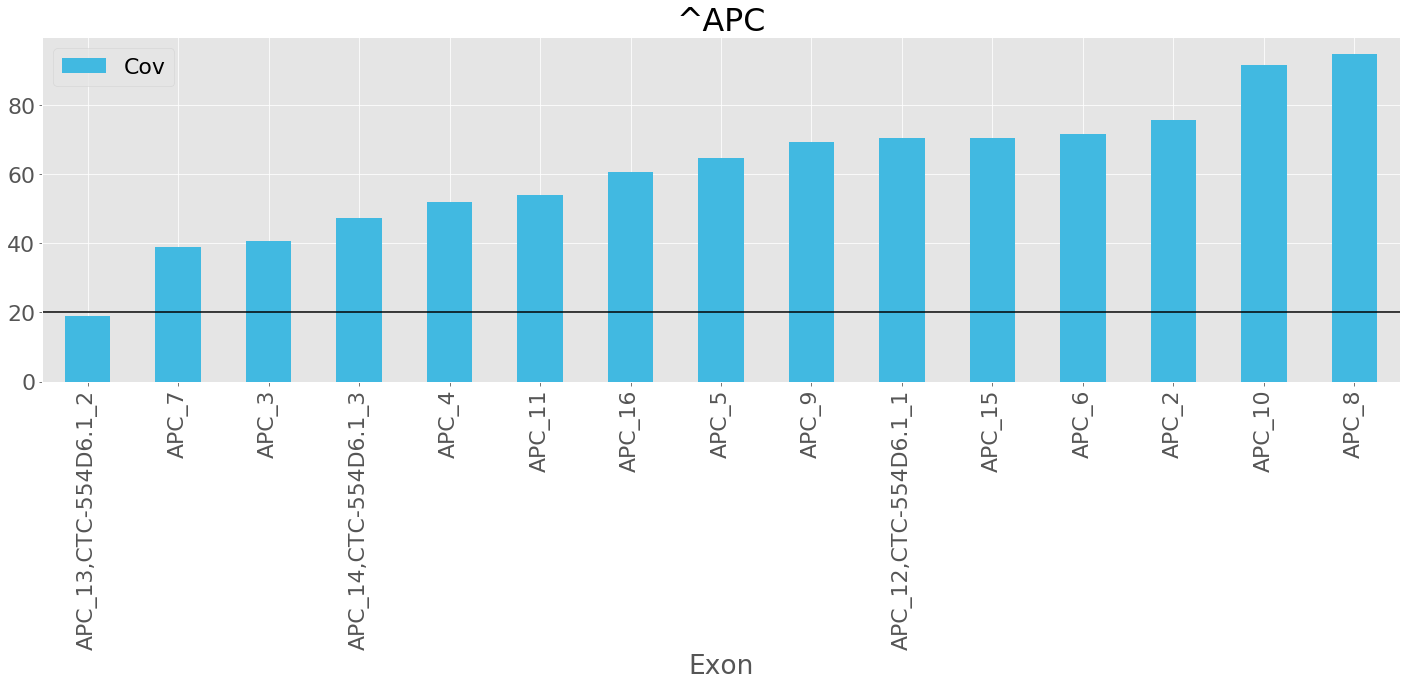

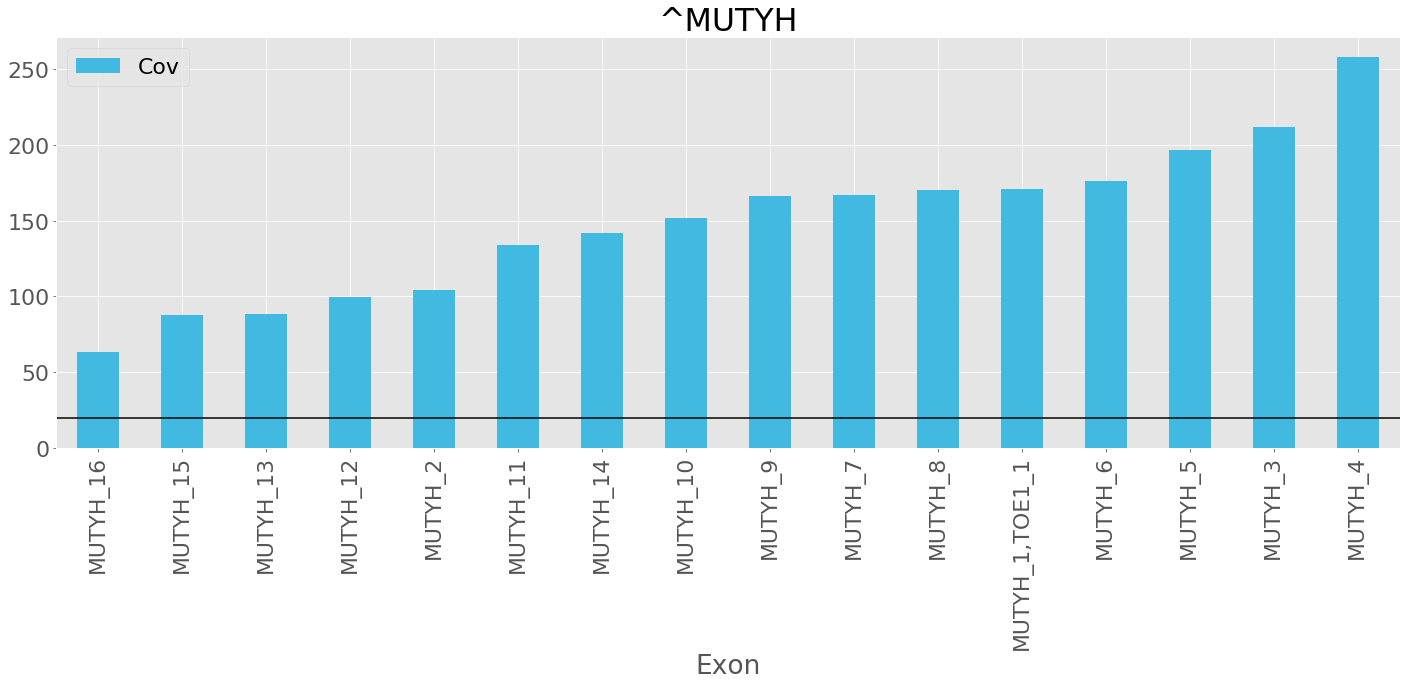

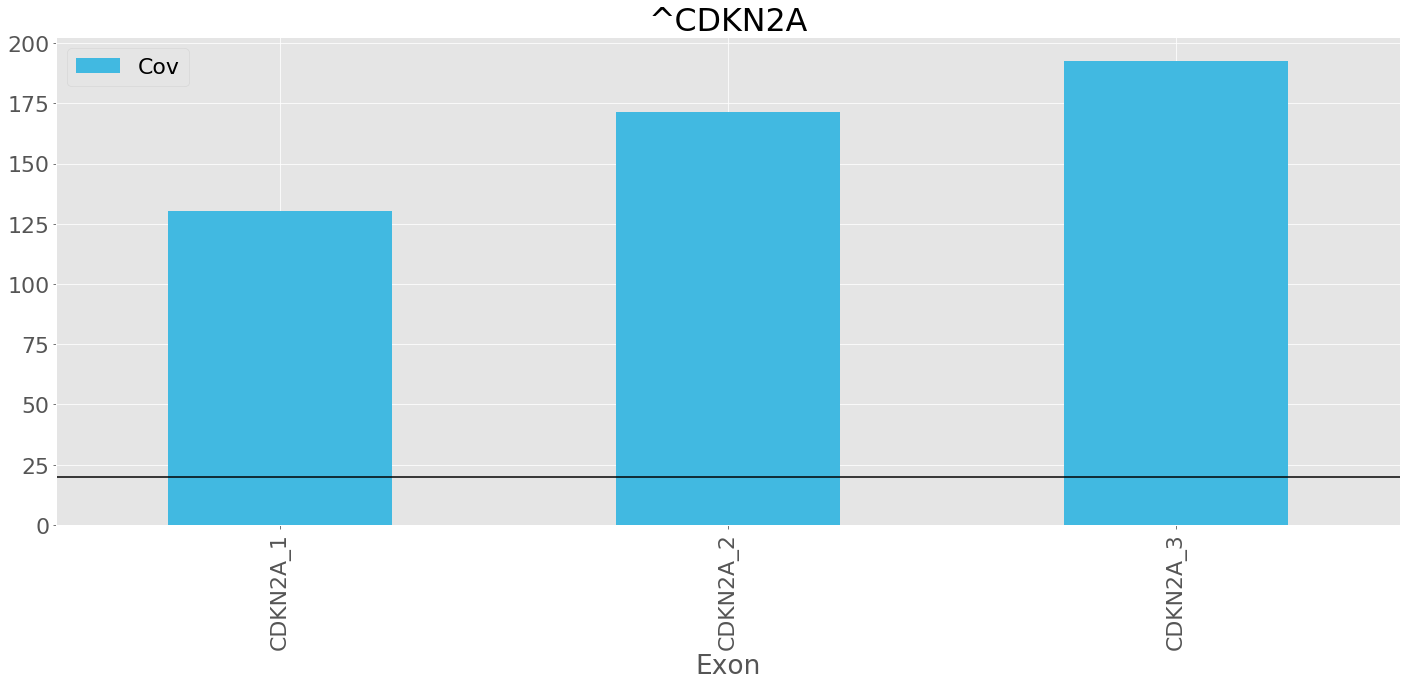

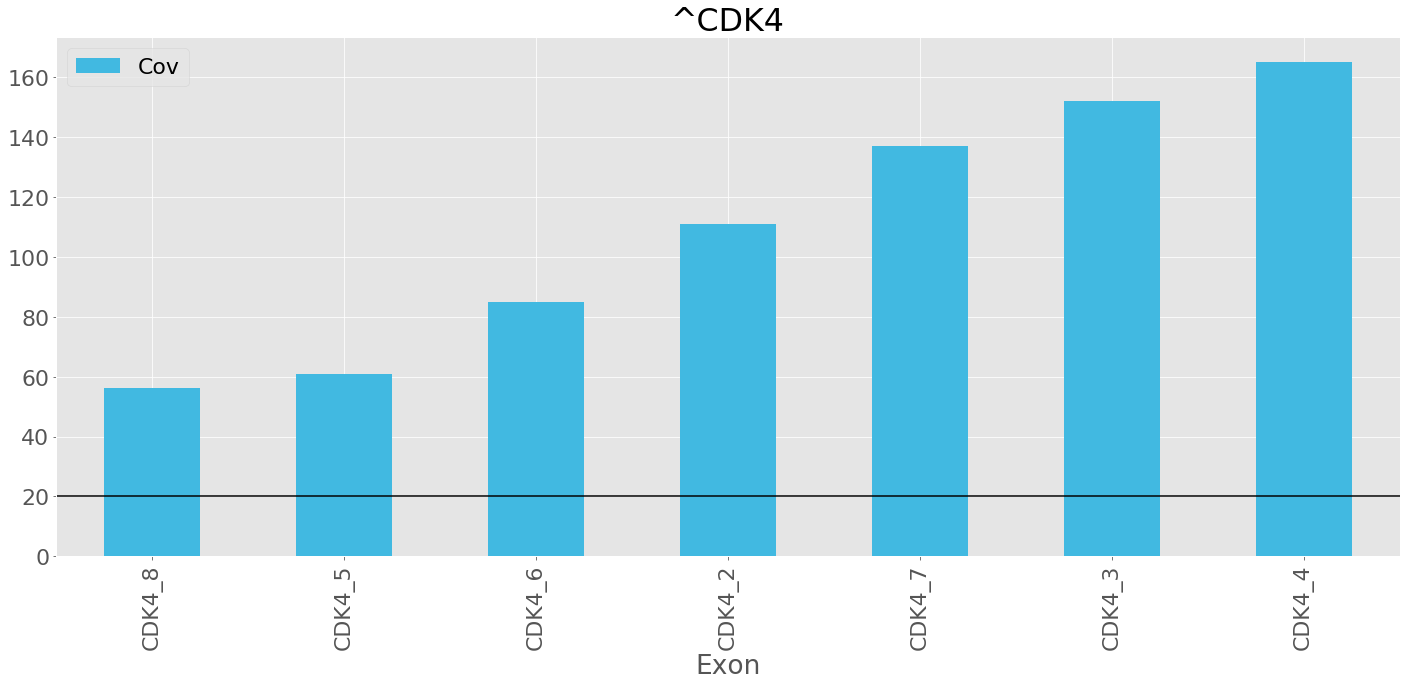

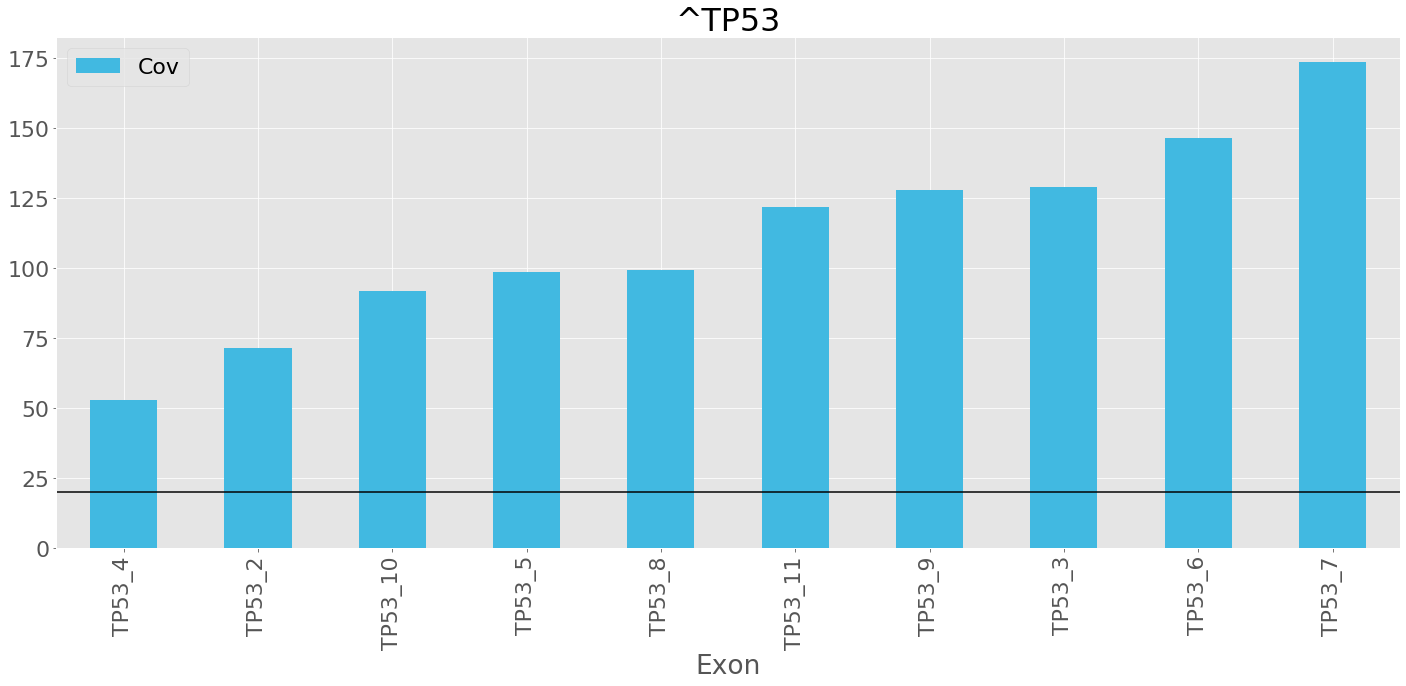

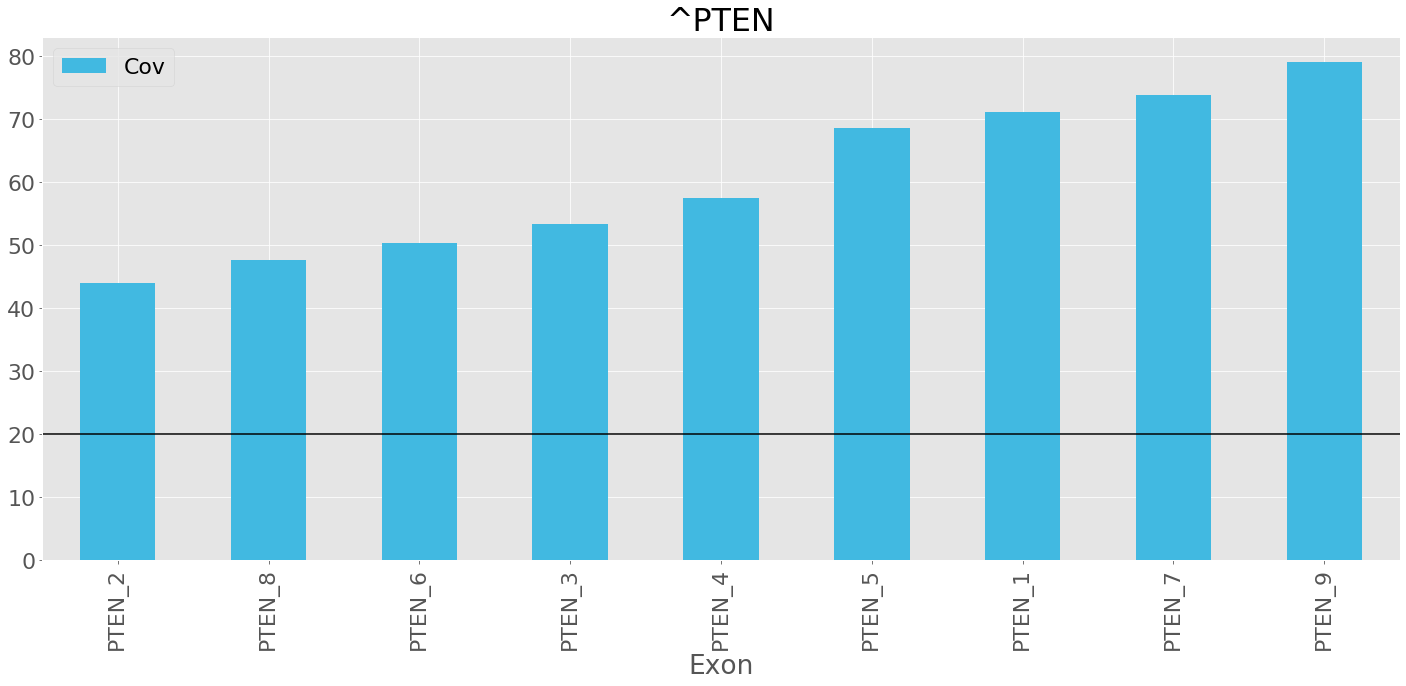

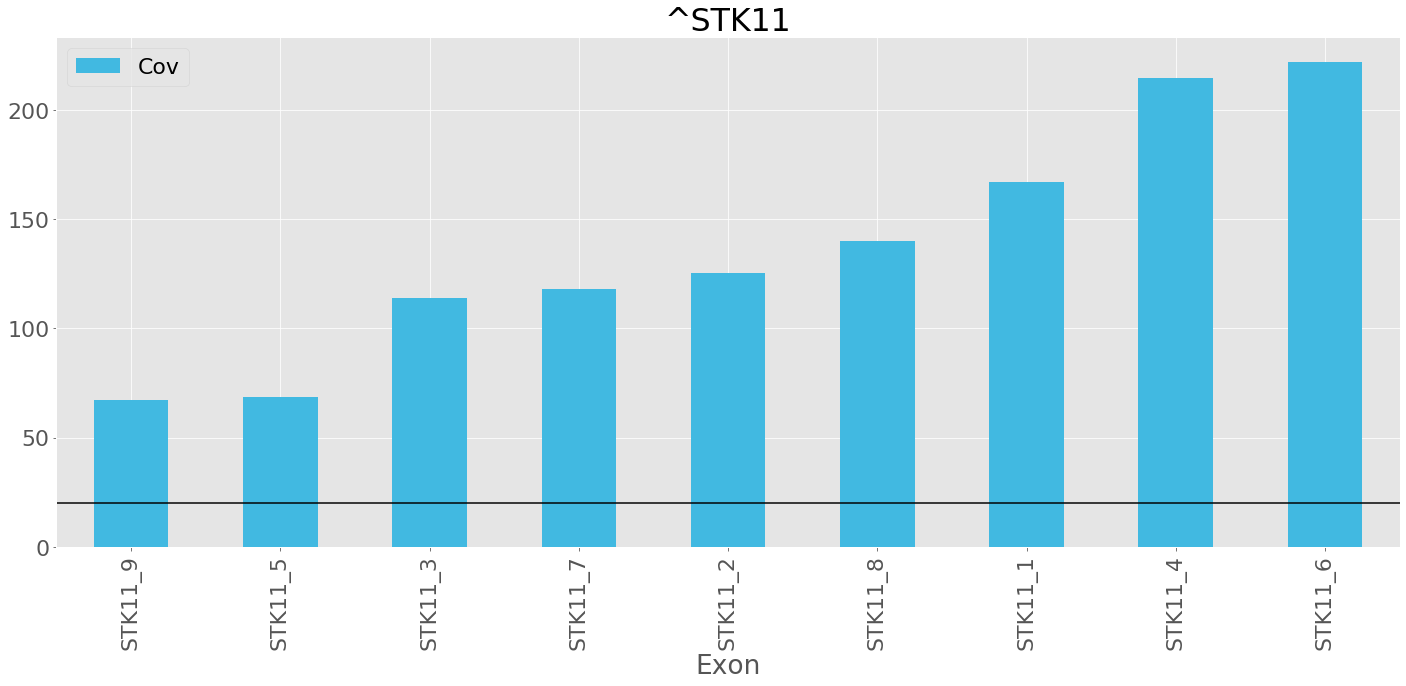

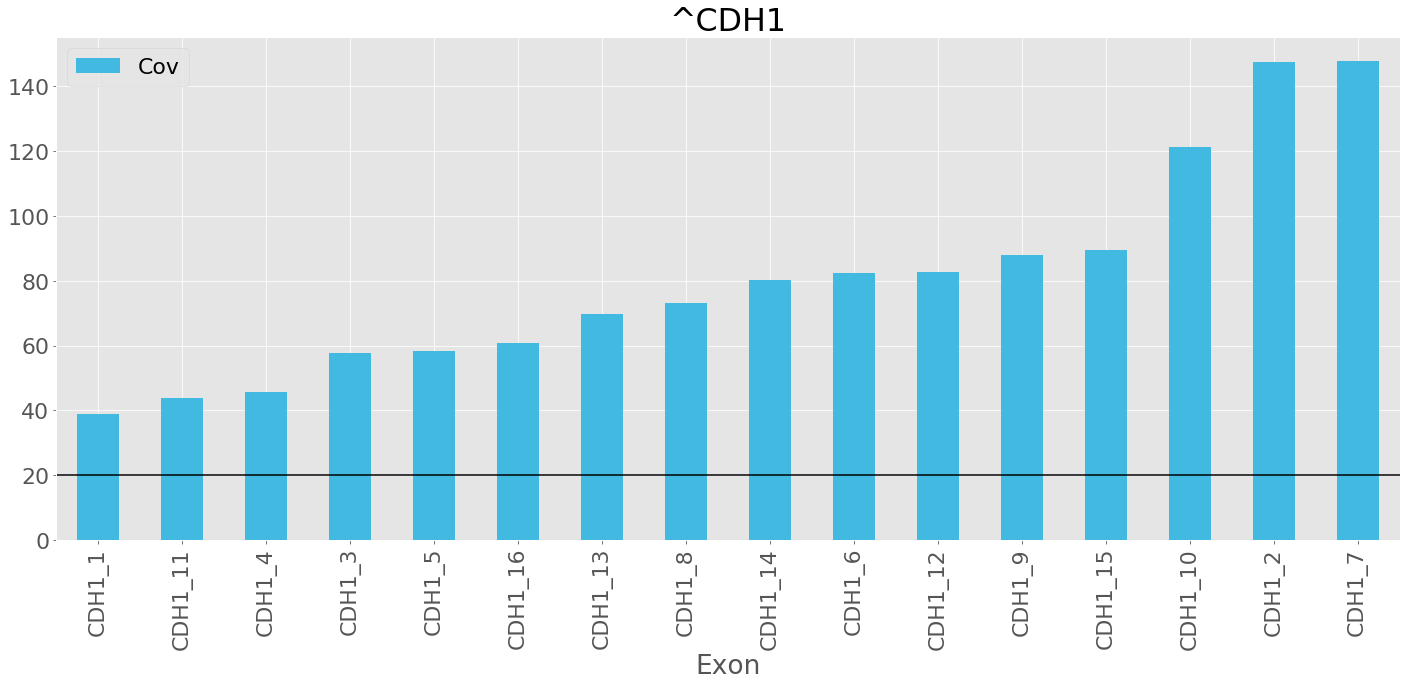

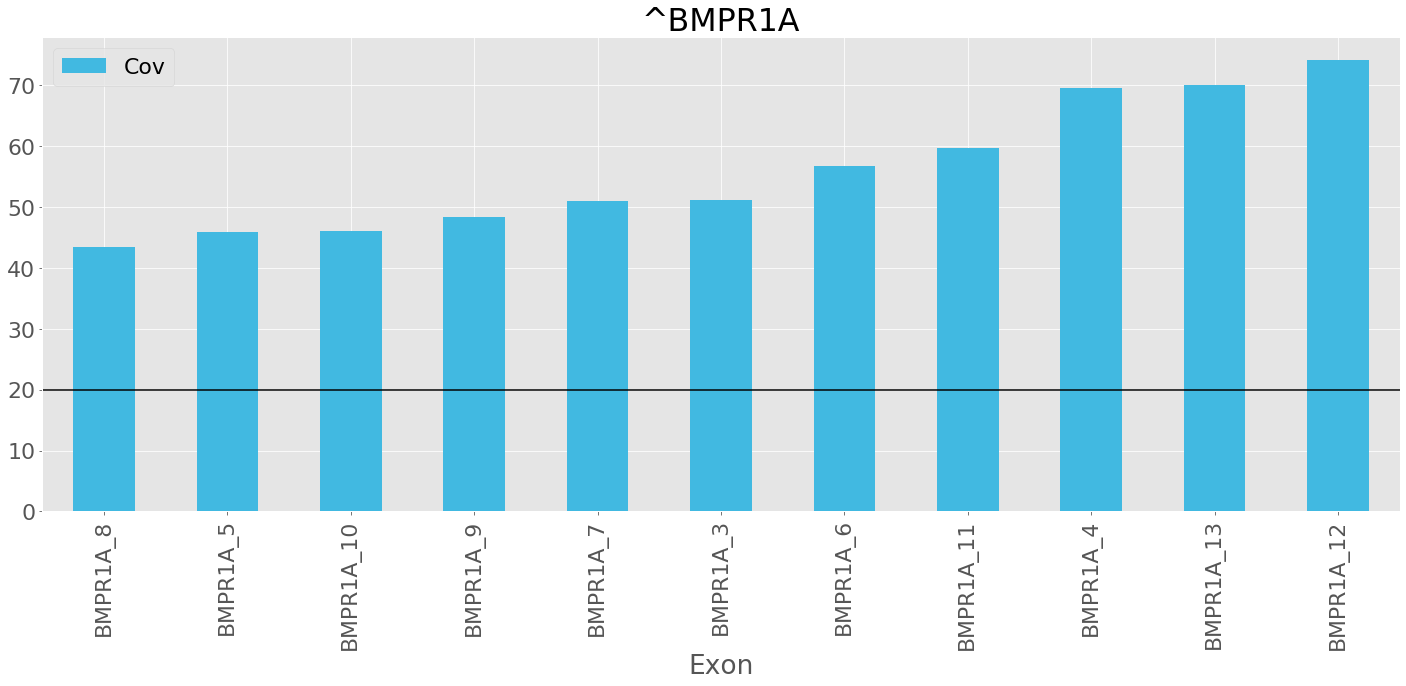

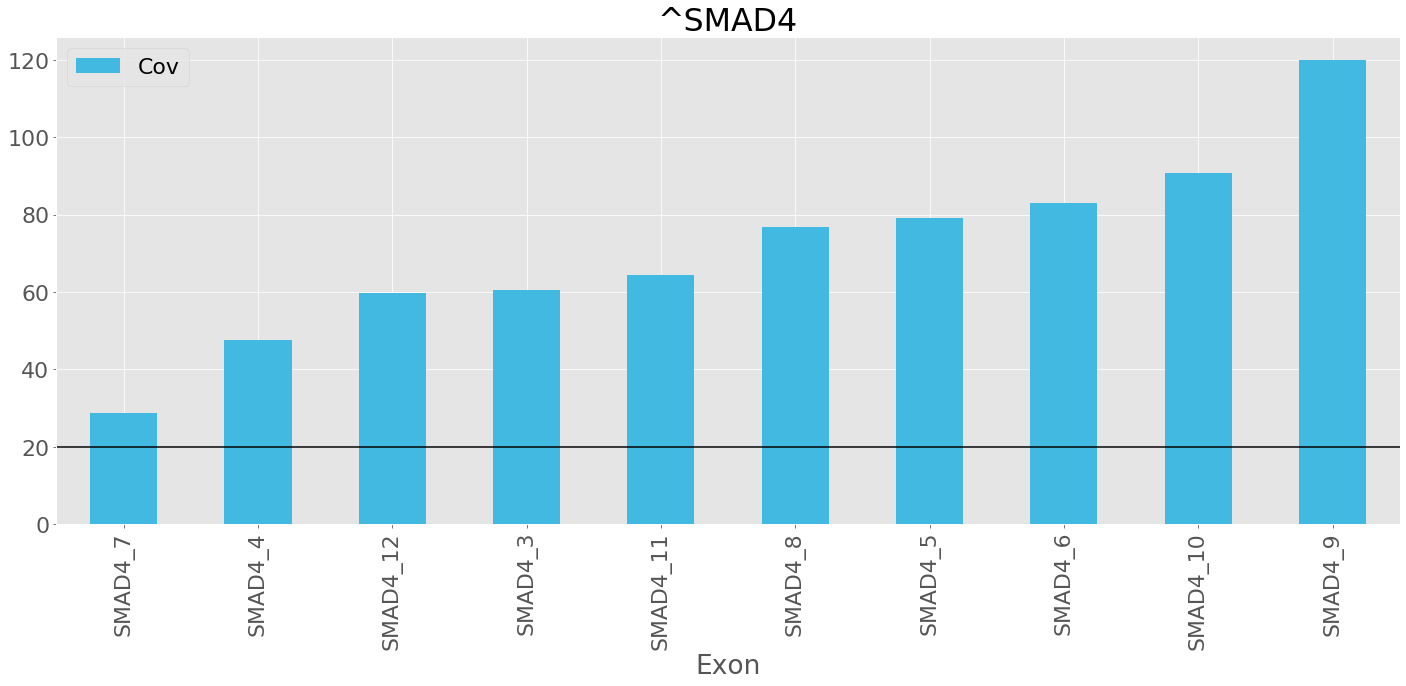

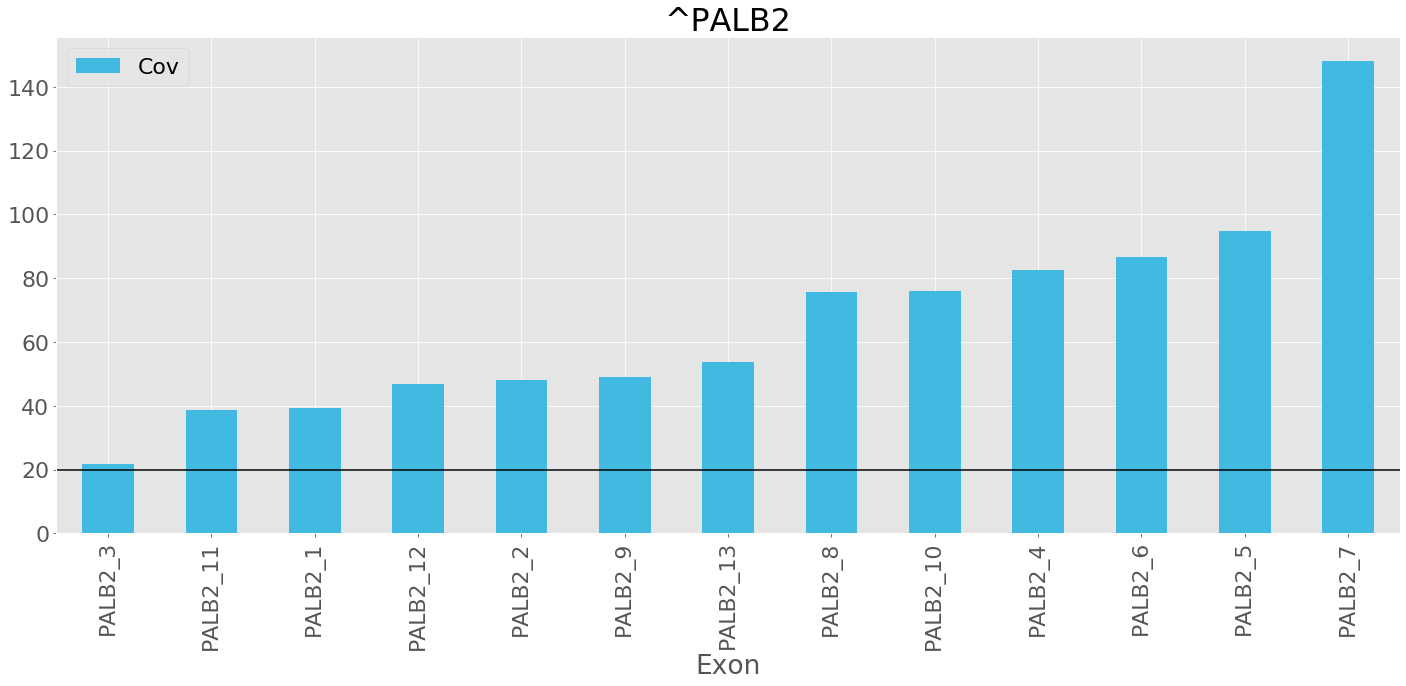

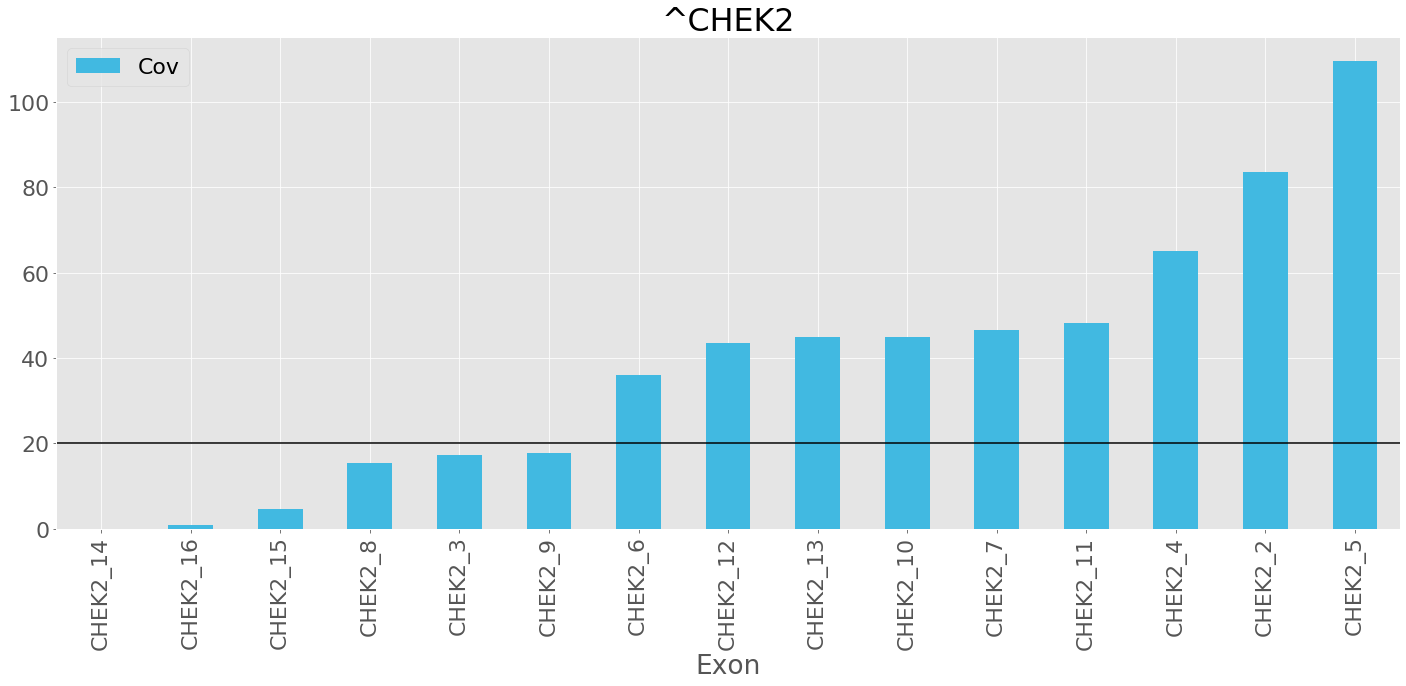

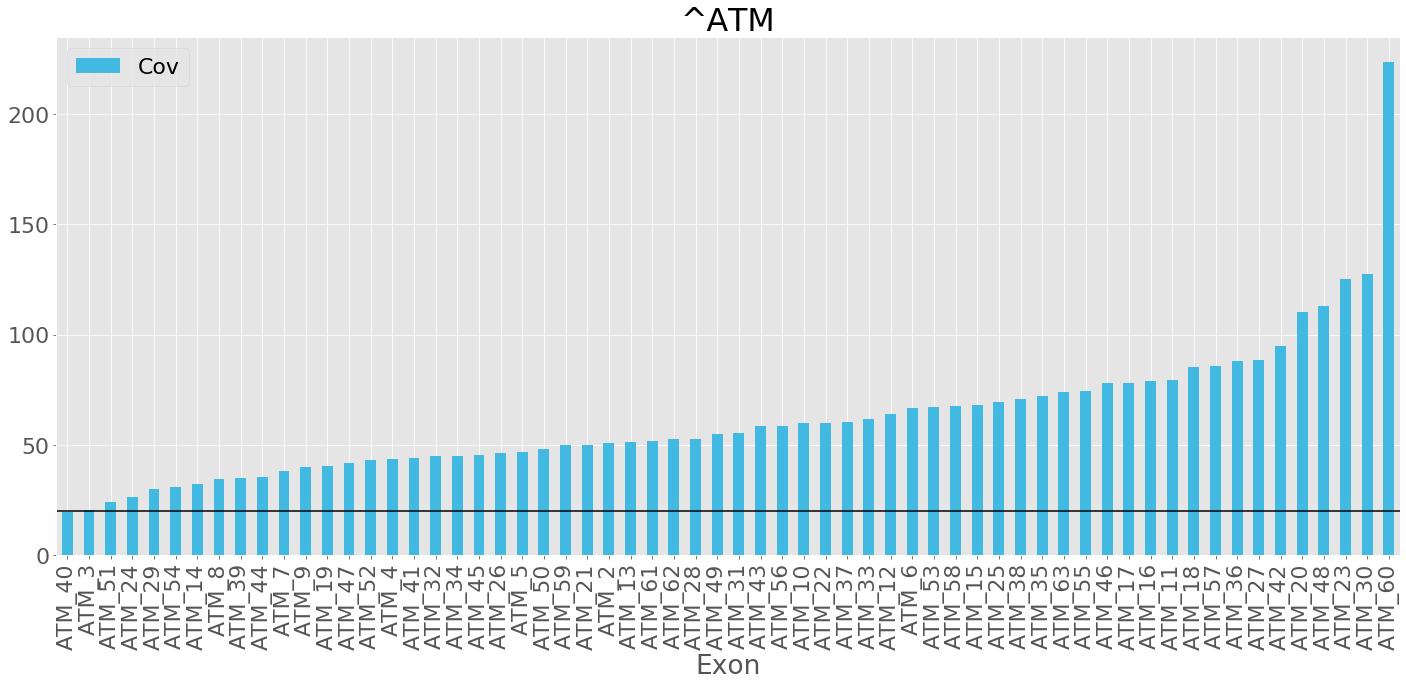

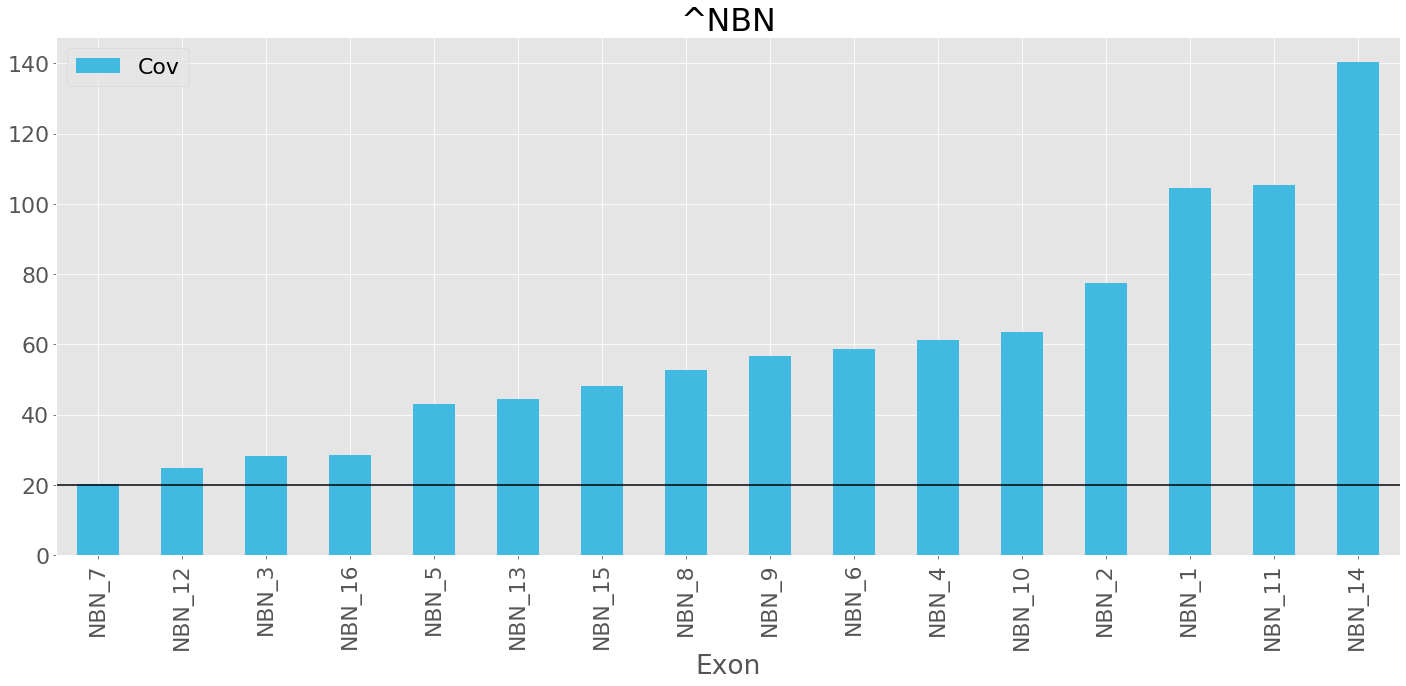

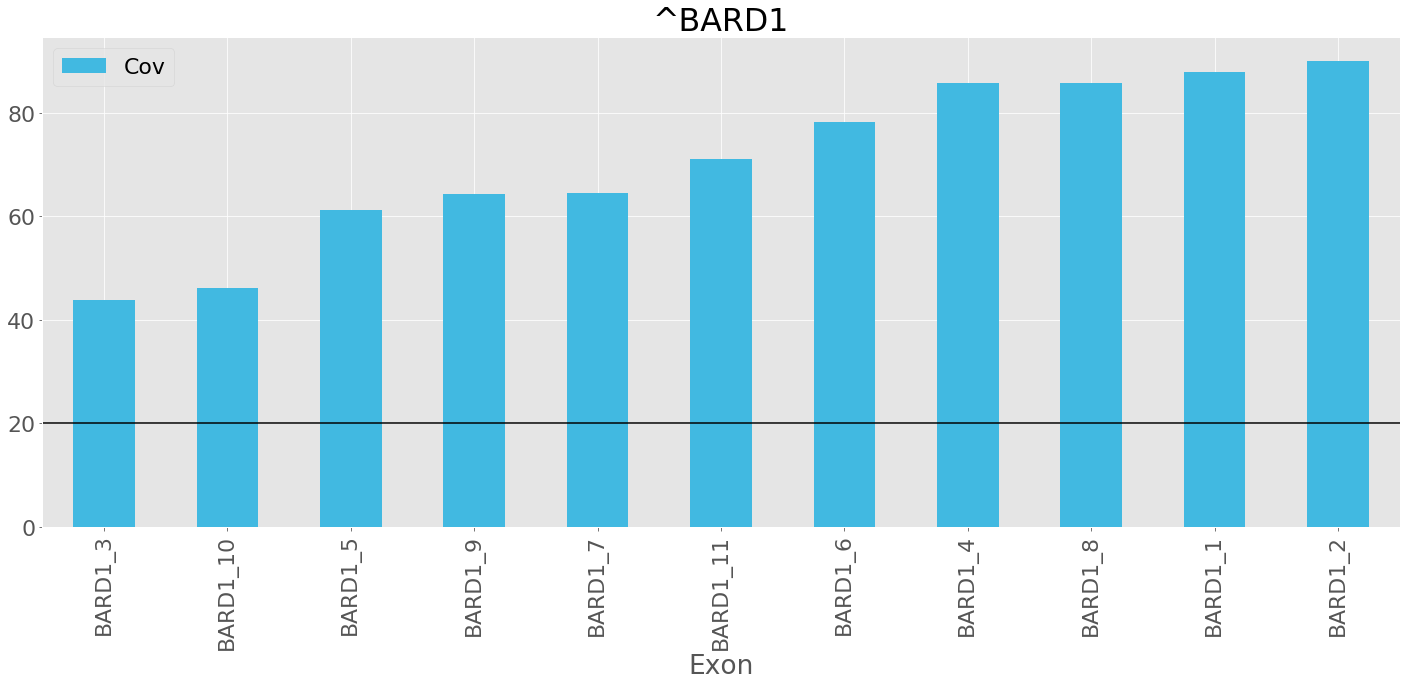

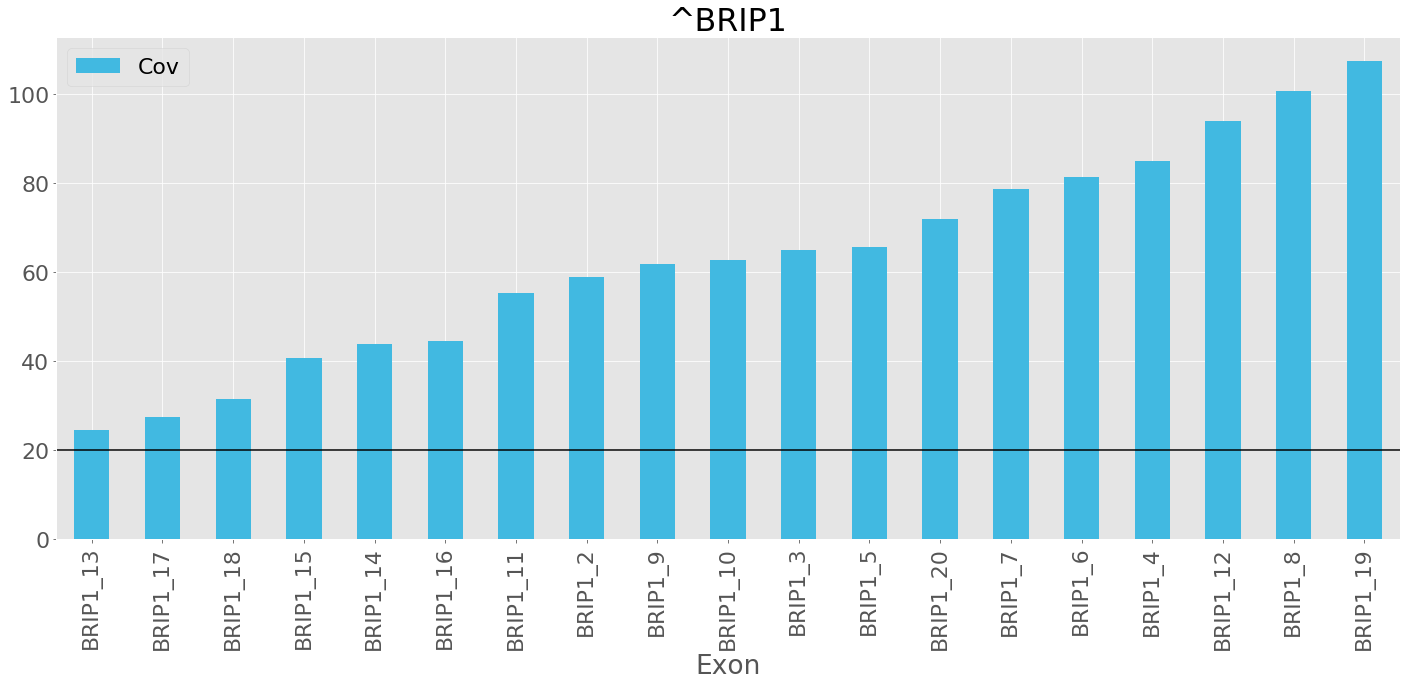

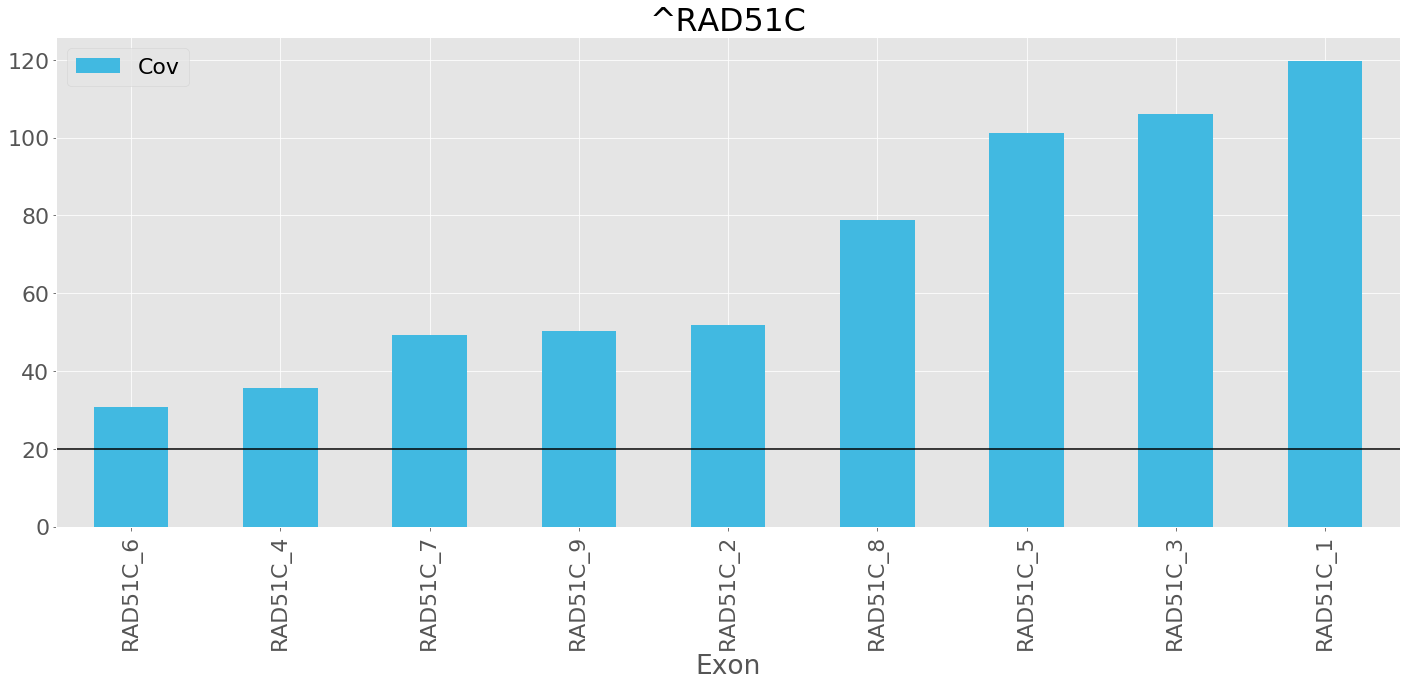

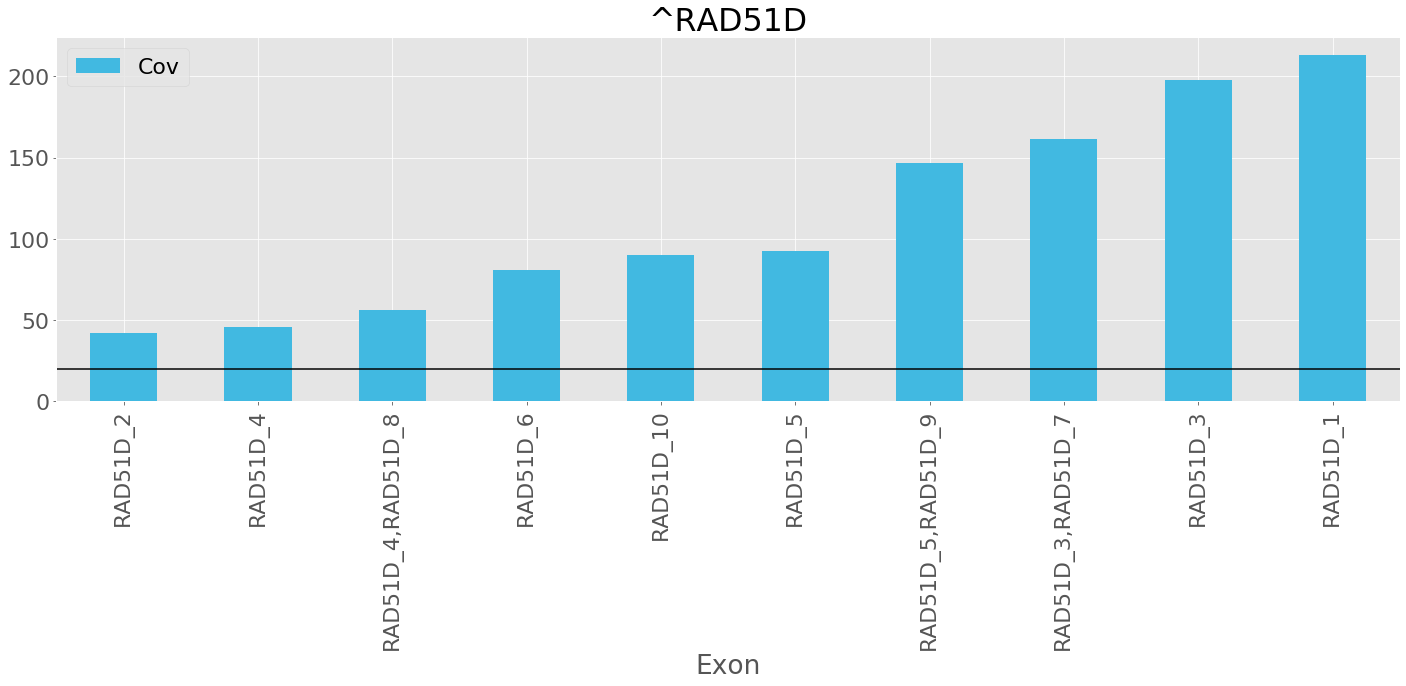

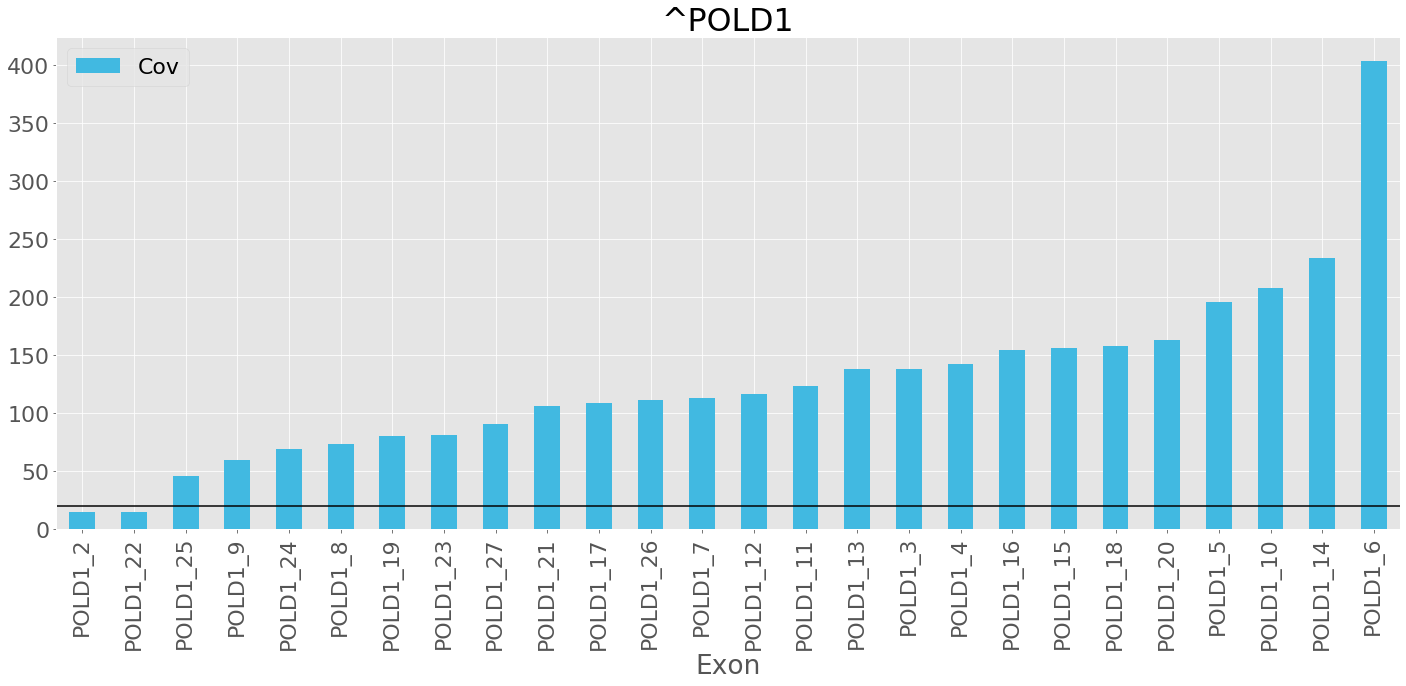

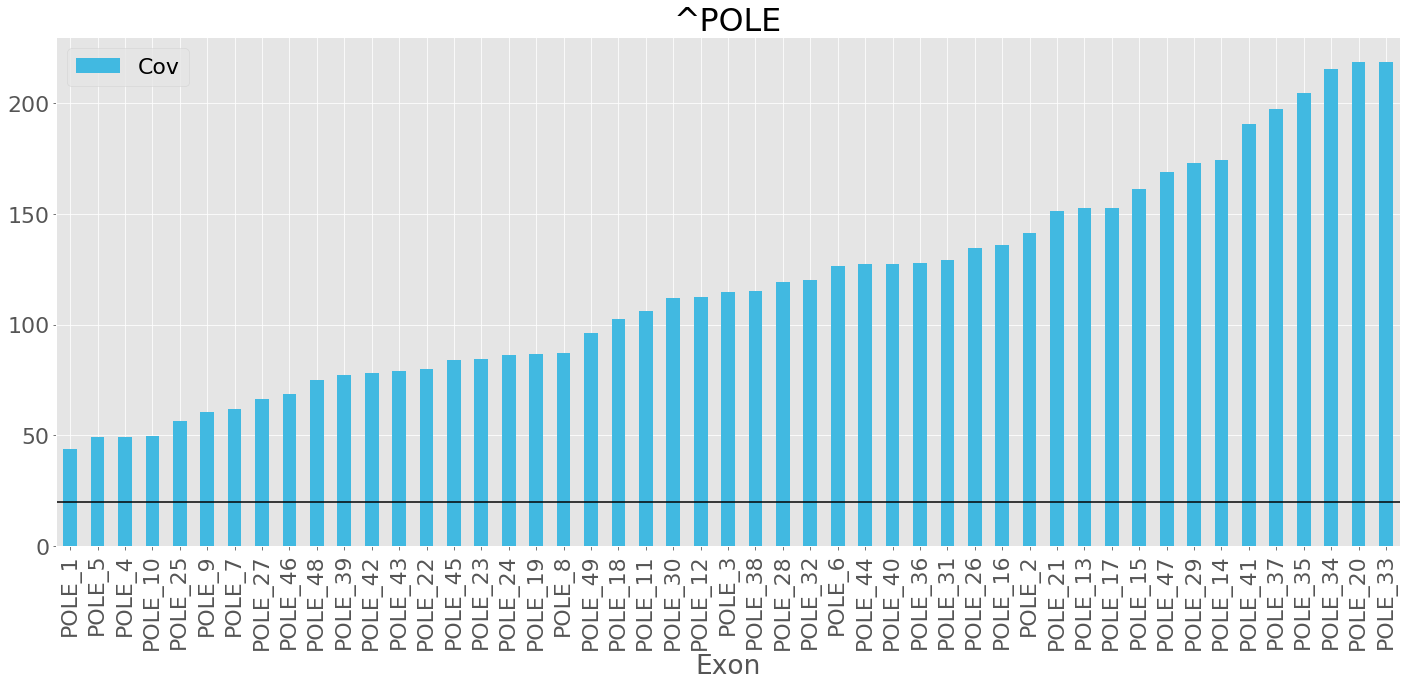

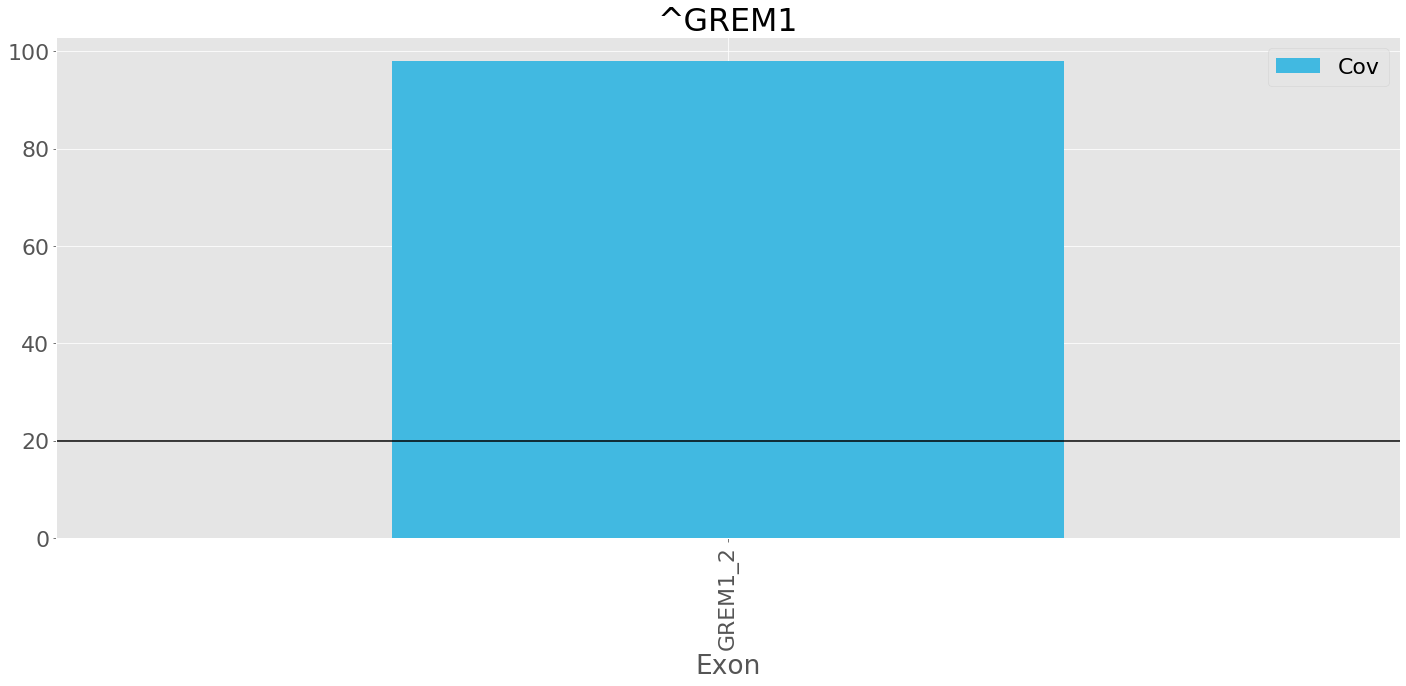

In [108]:
for genes in genes:
    grafico_media(genes)

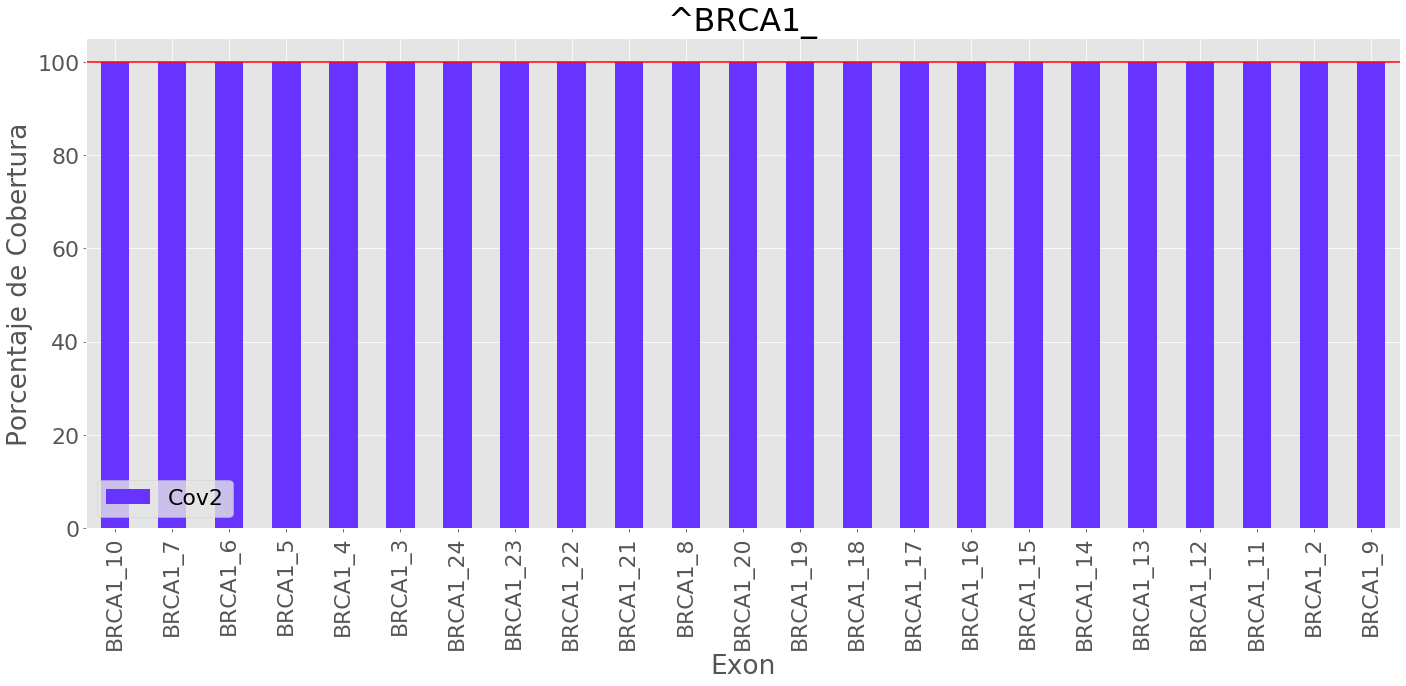

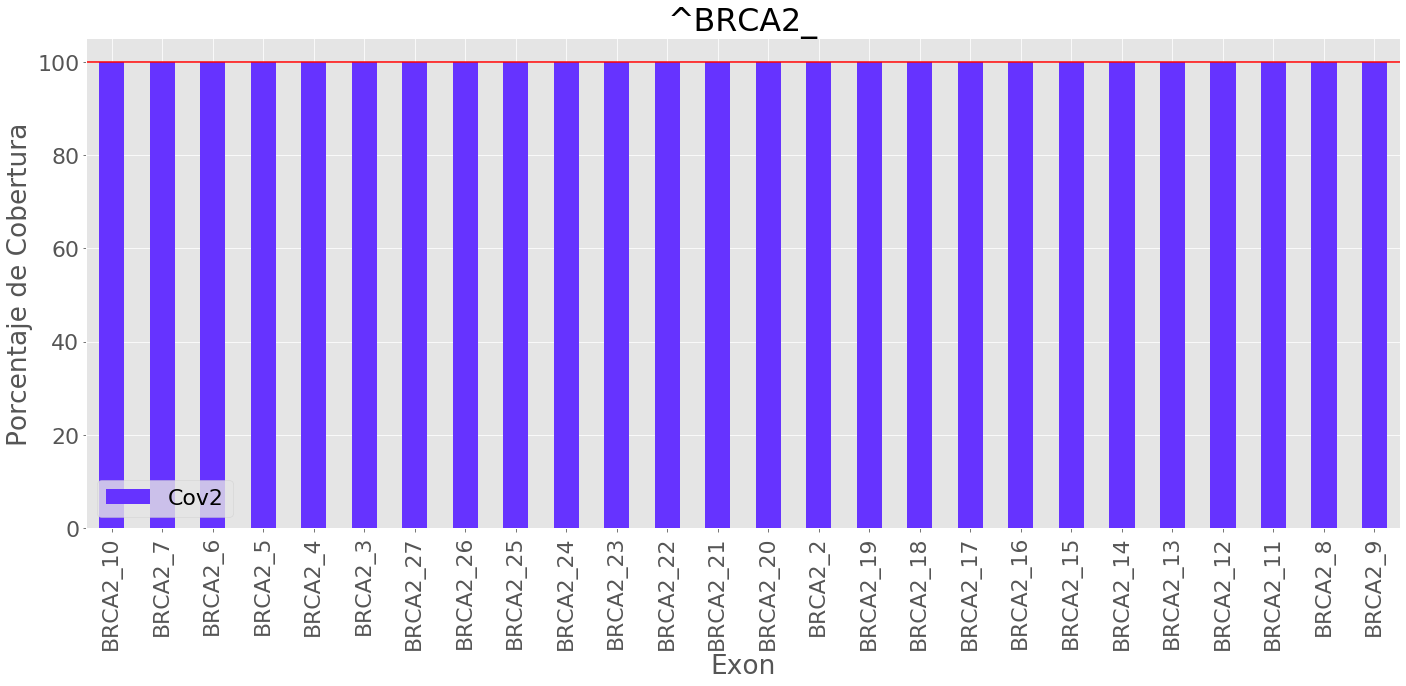

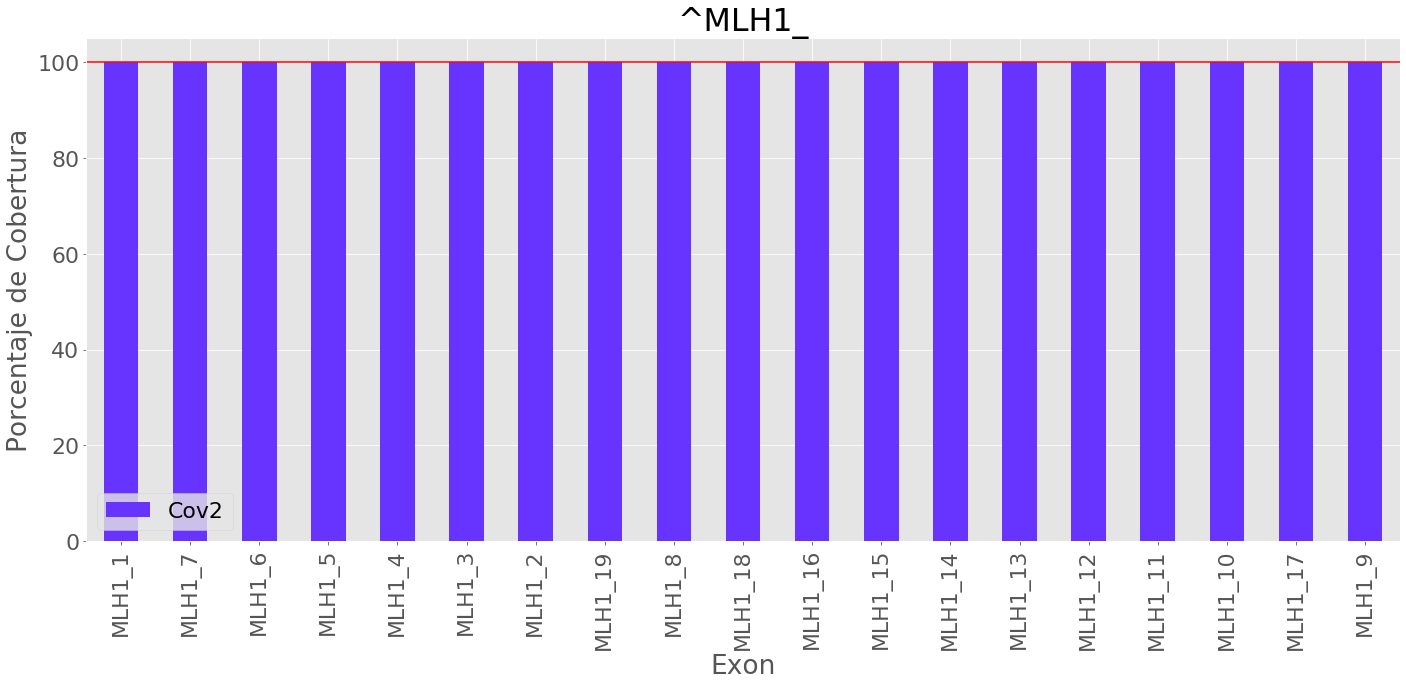

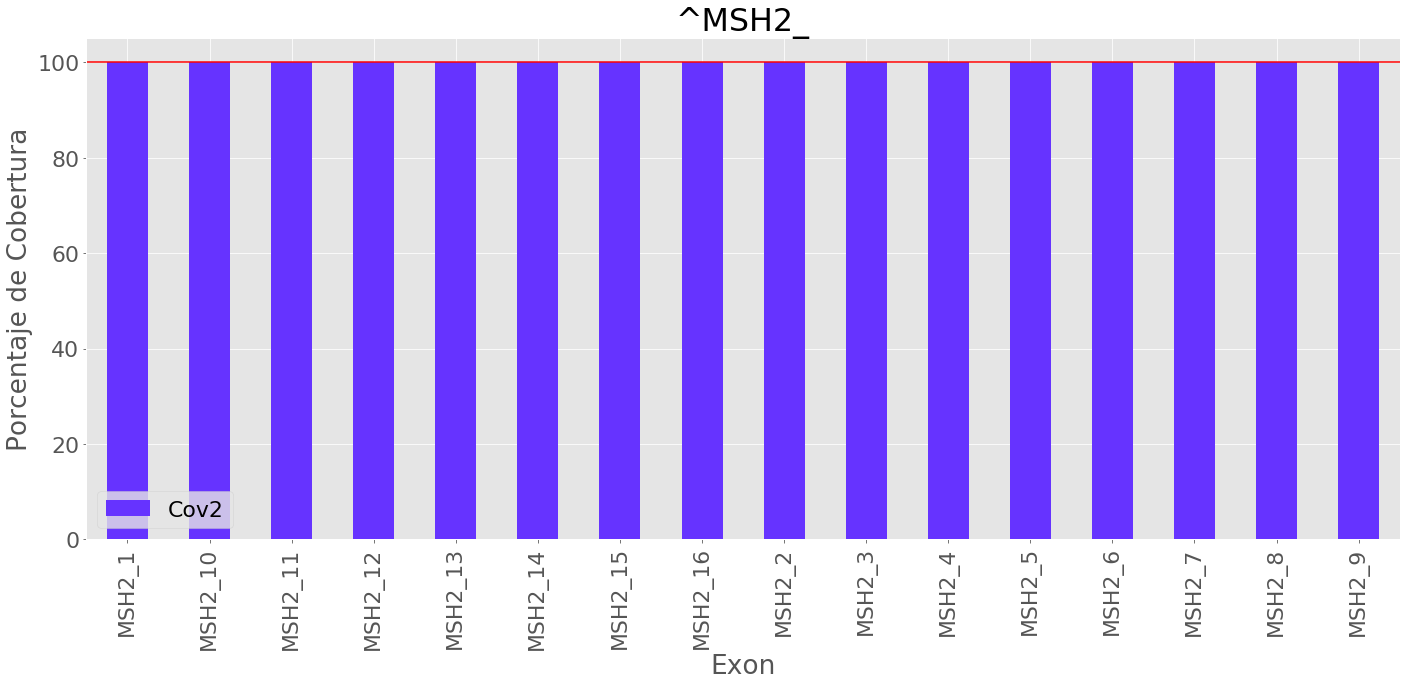

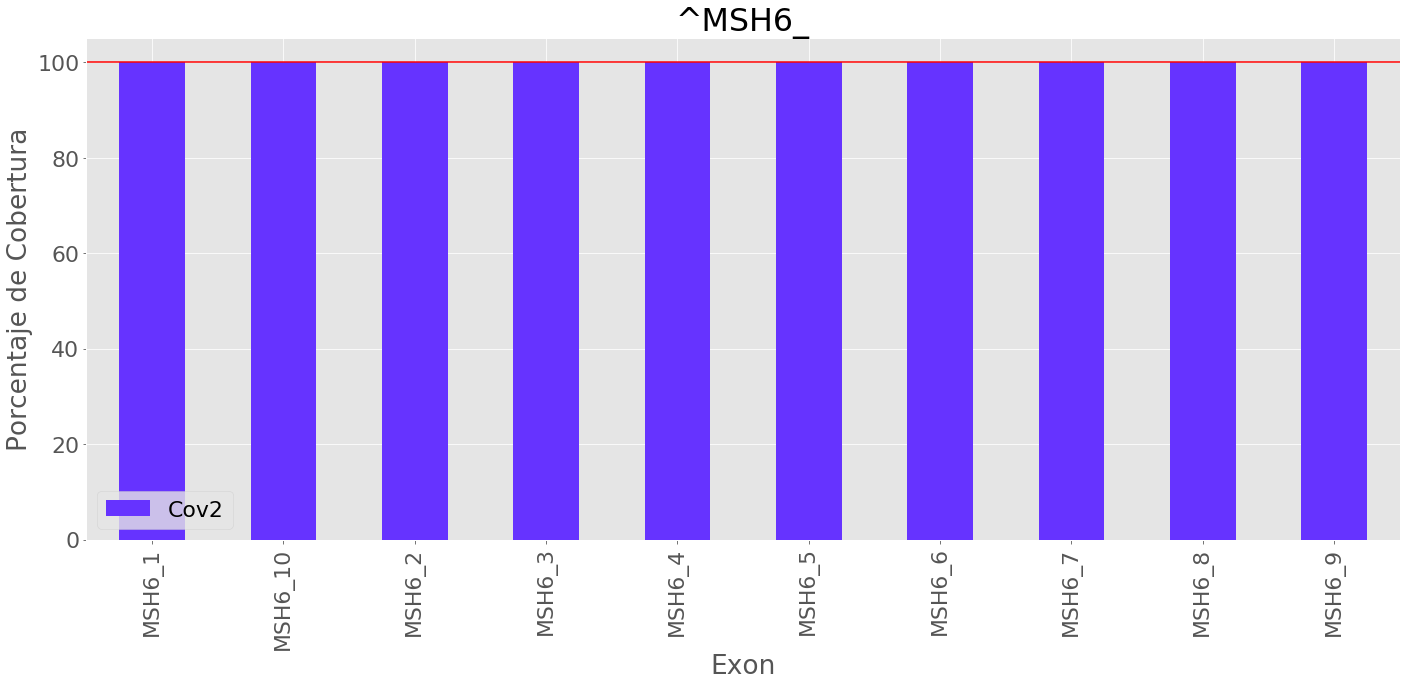

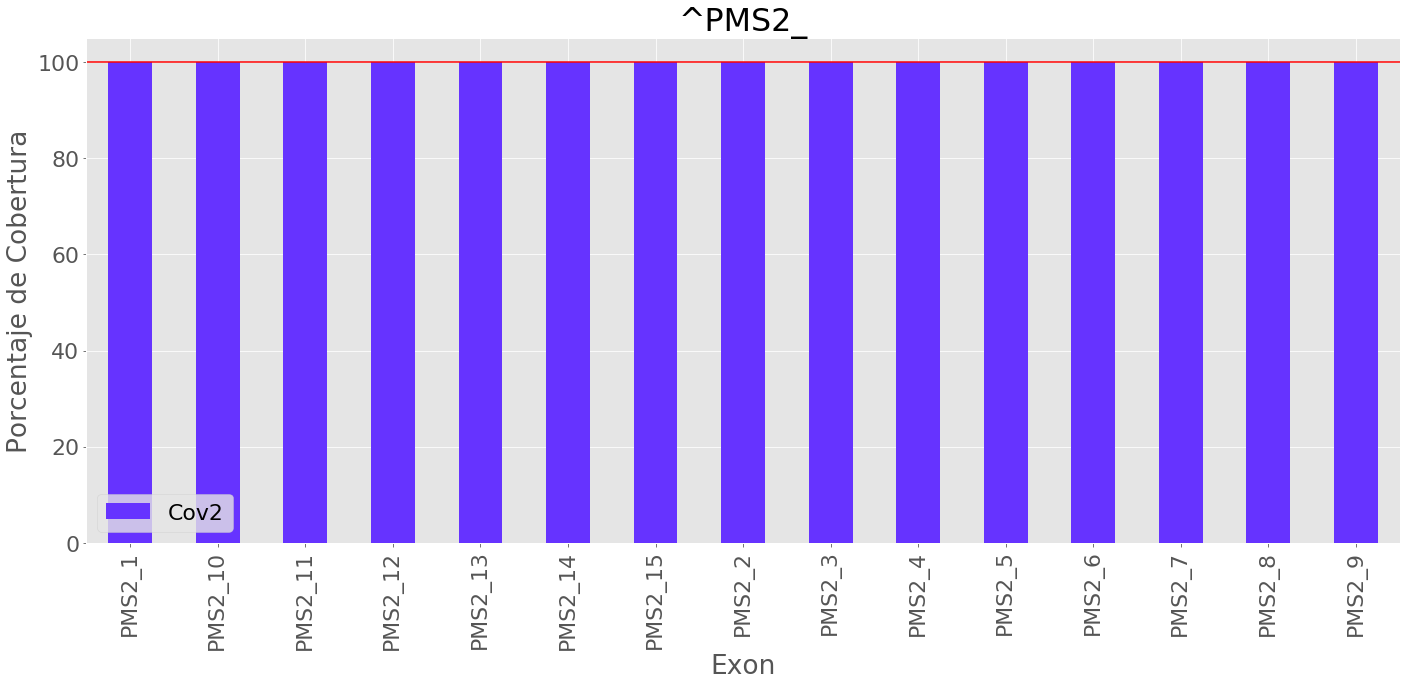

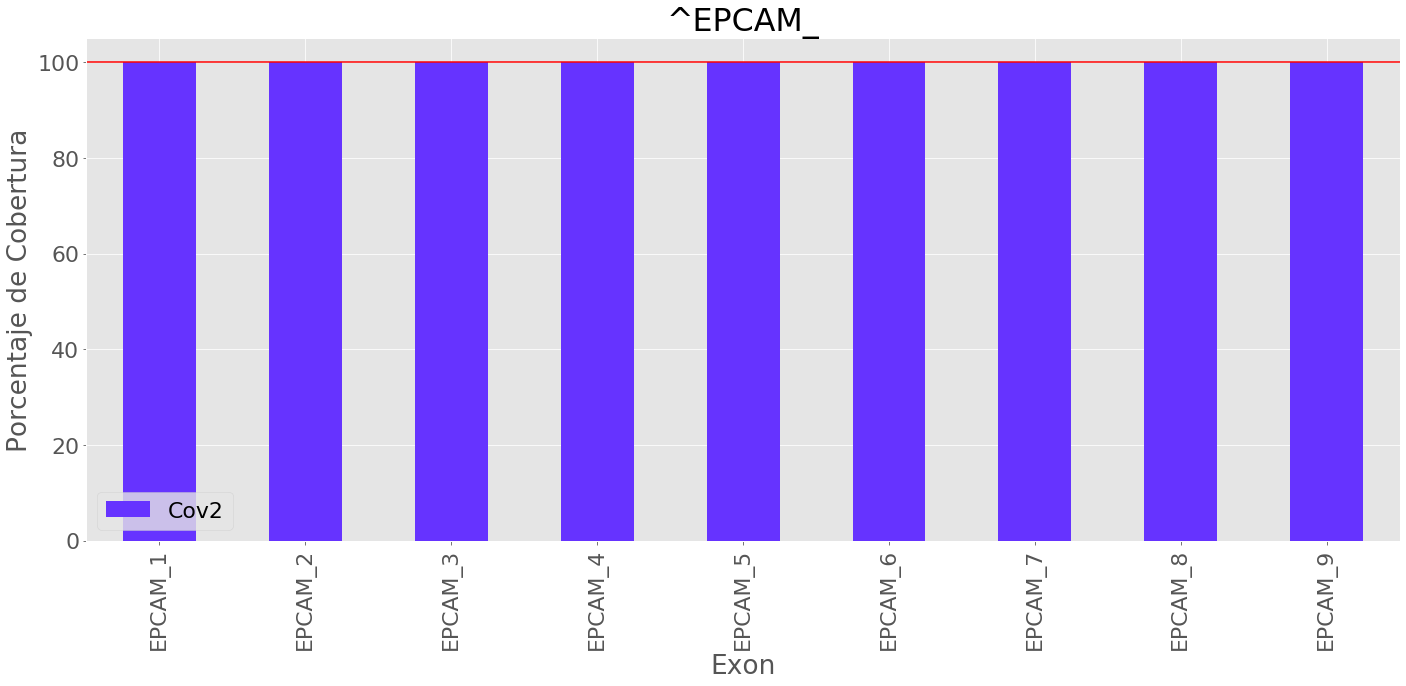

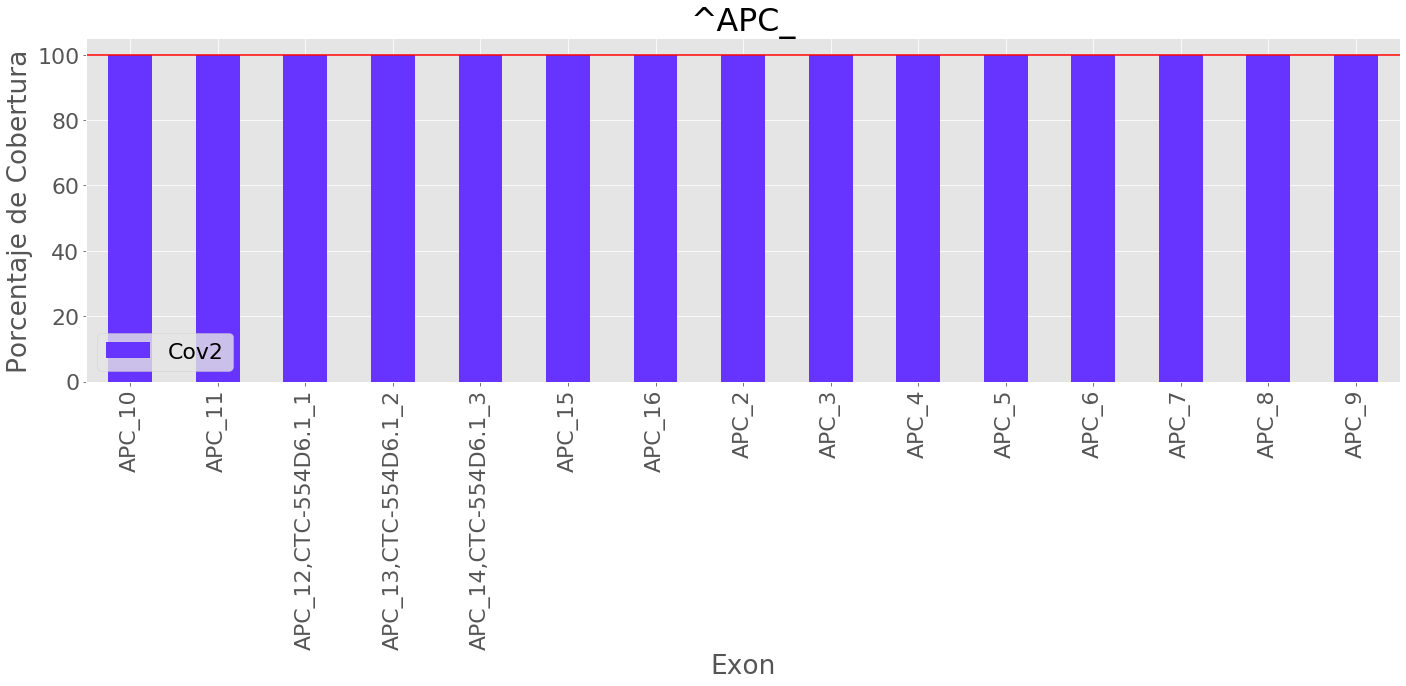

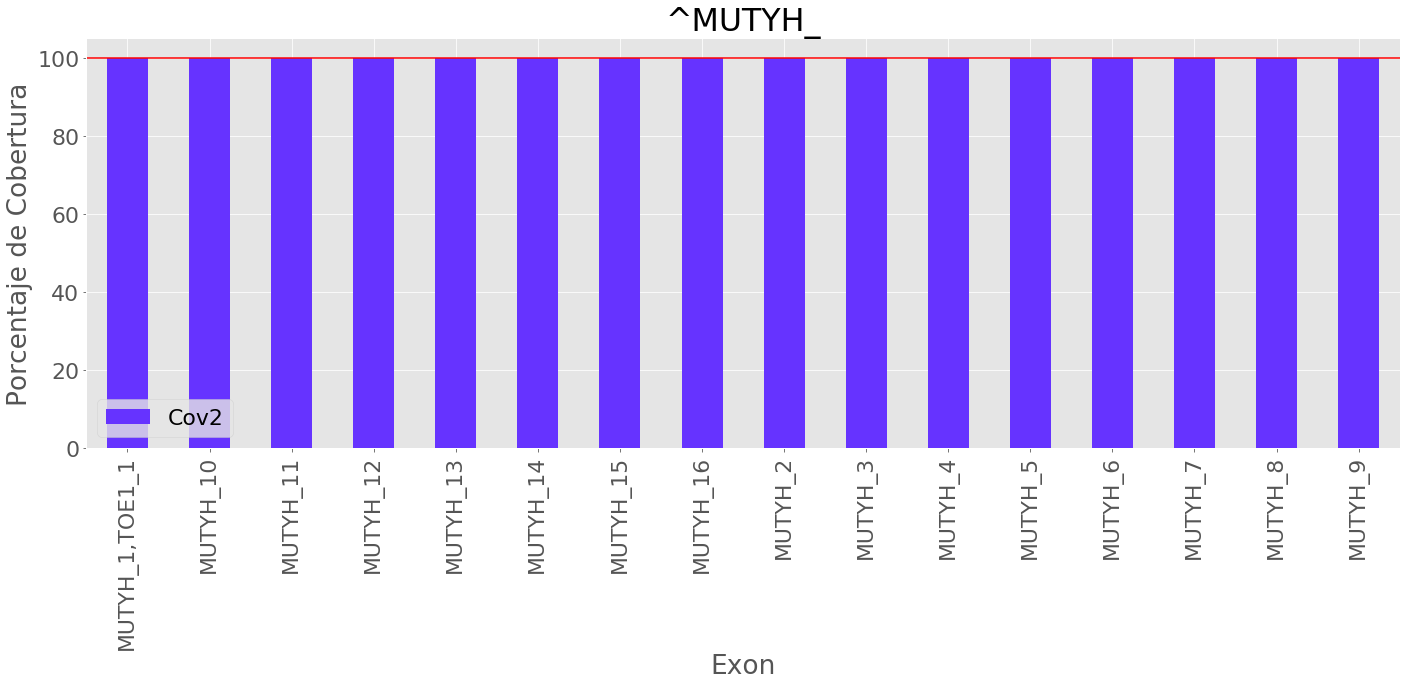

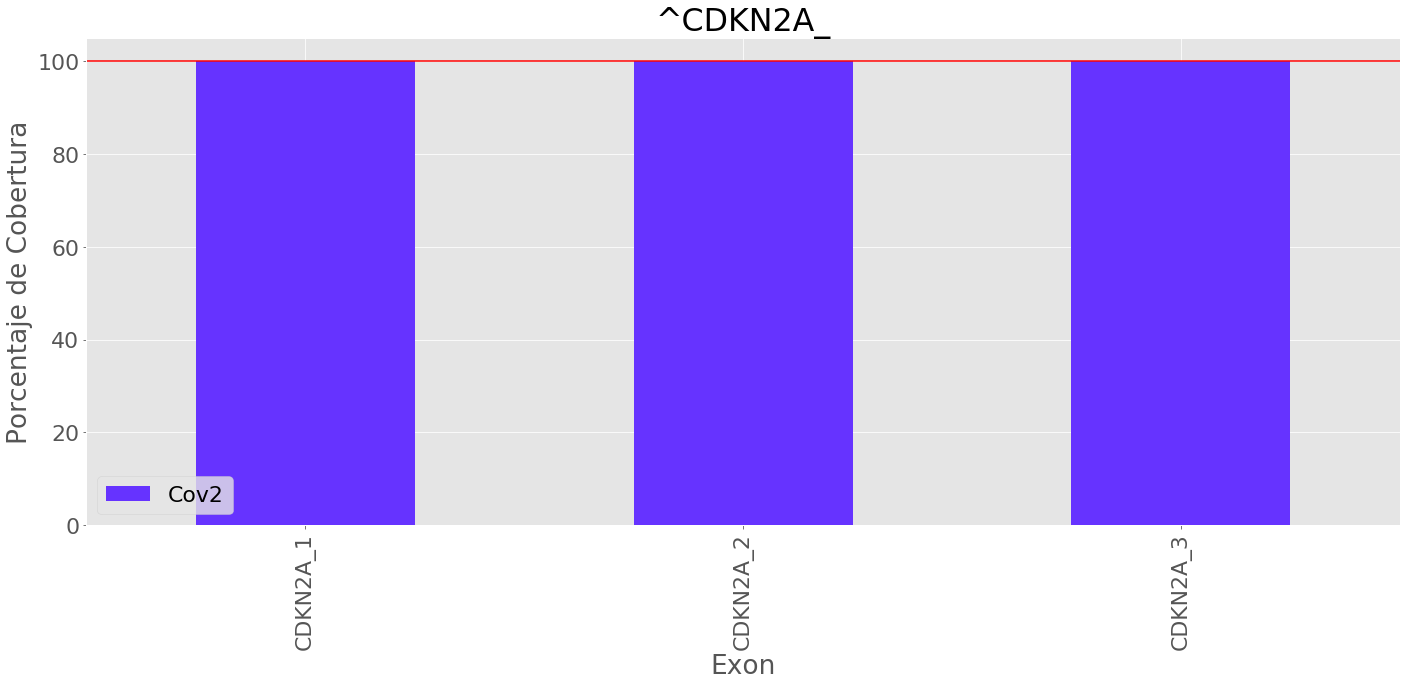

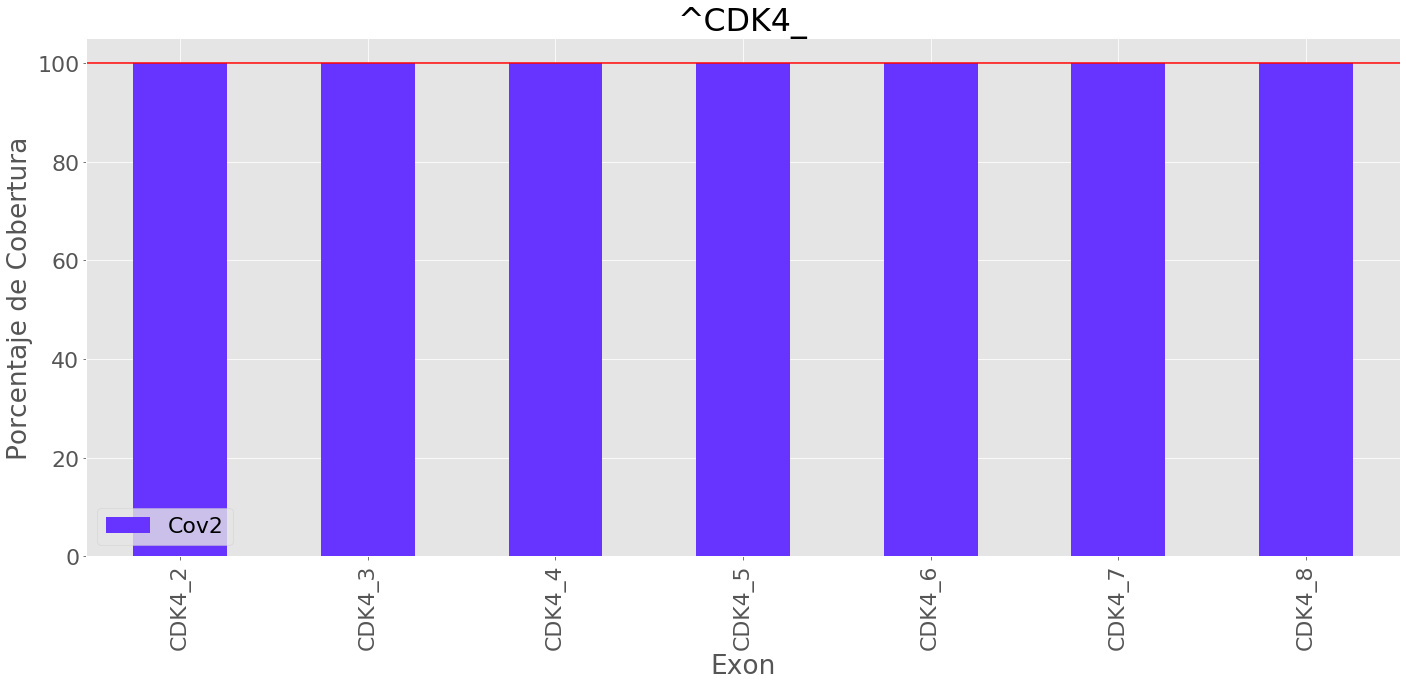

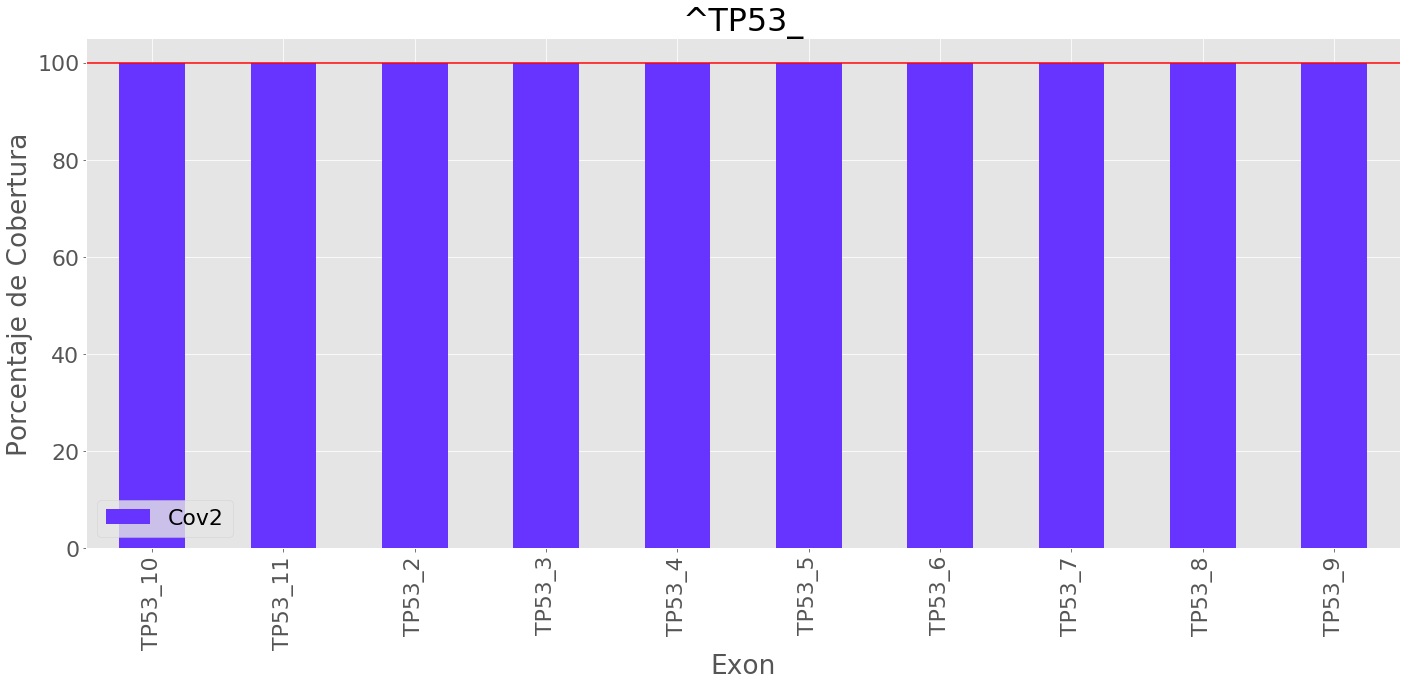

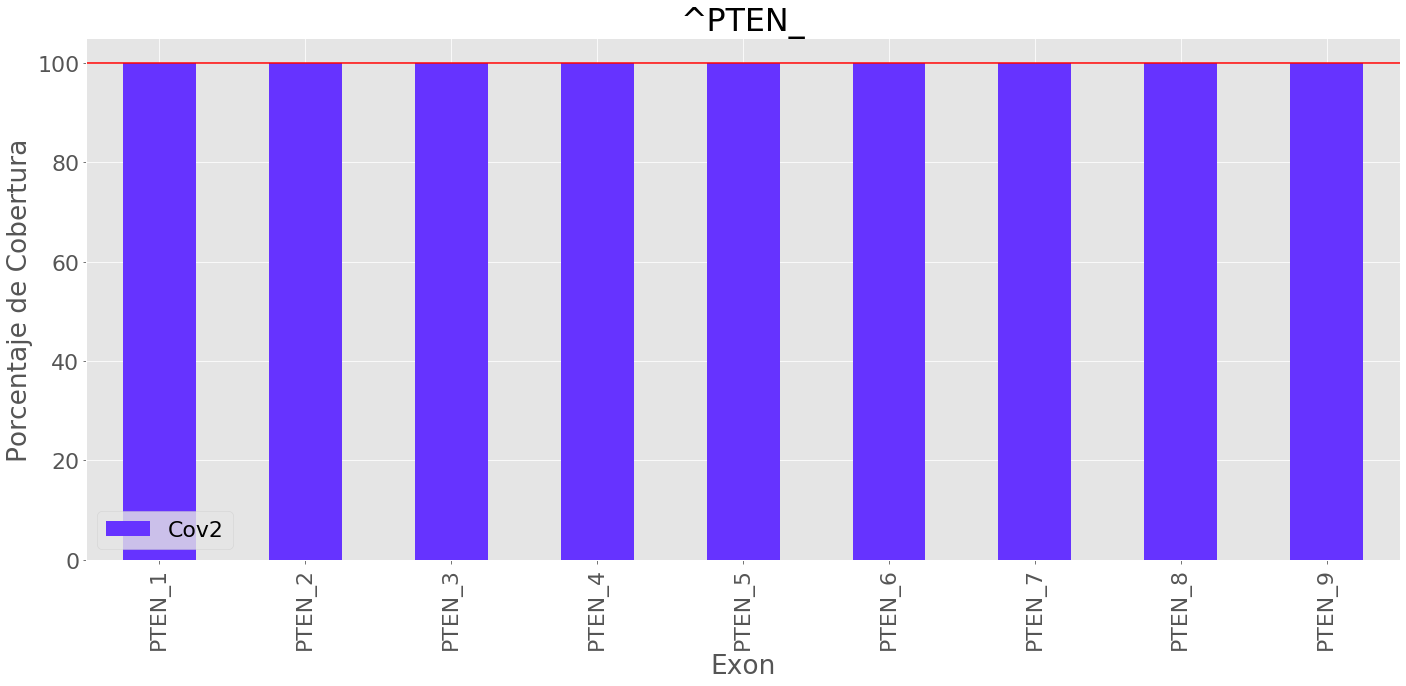

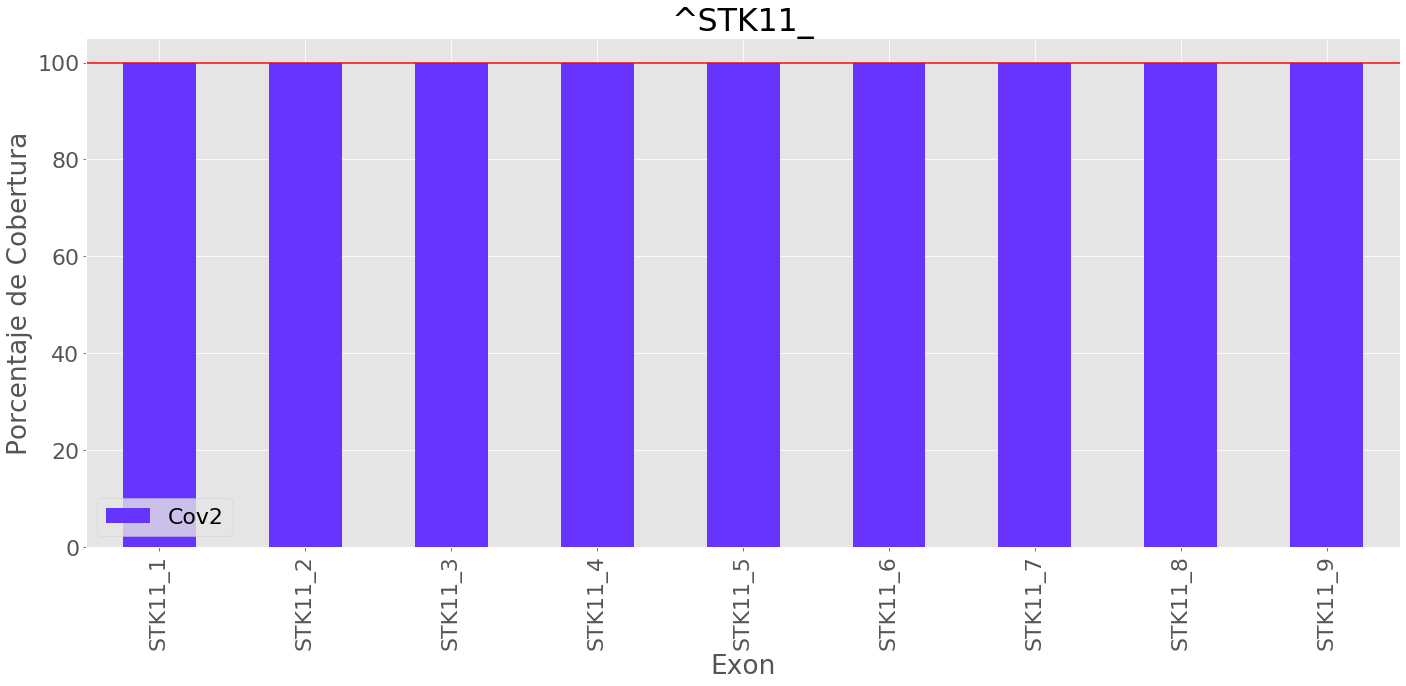

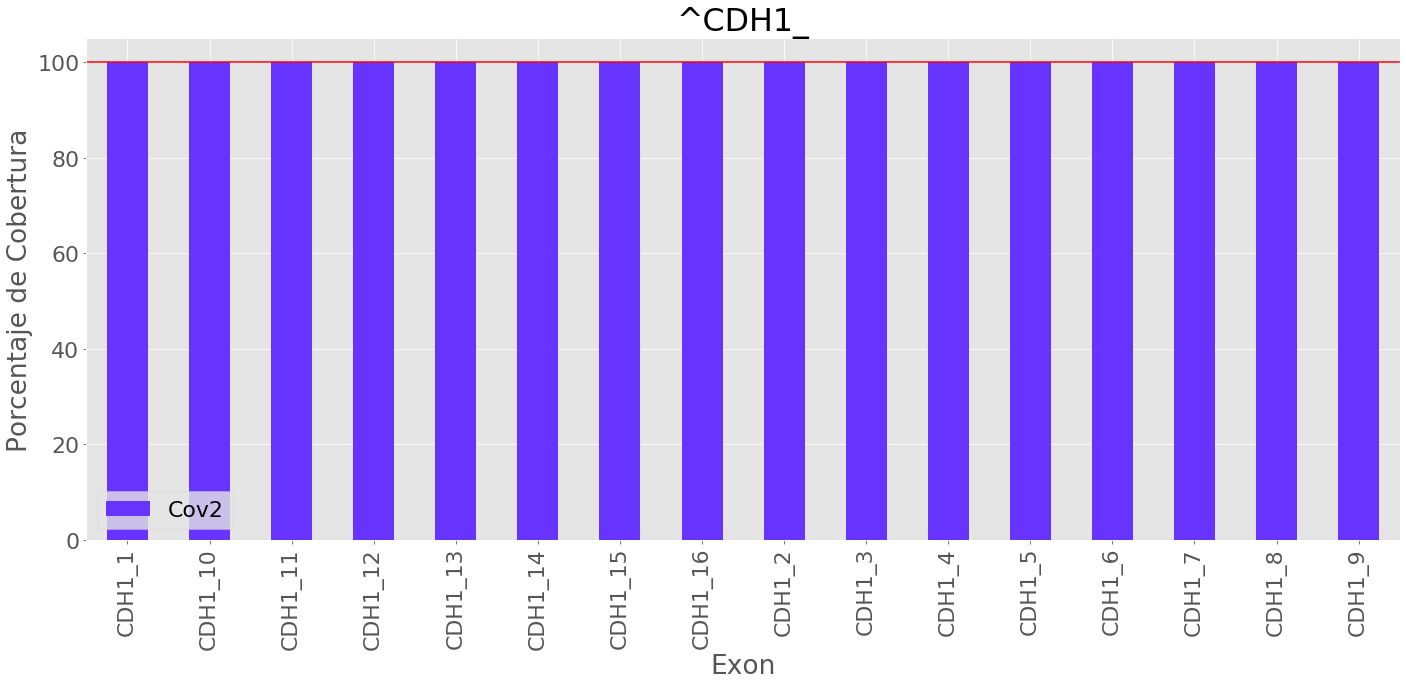

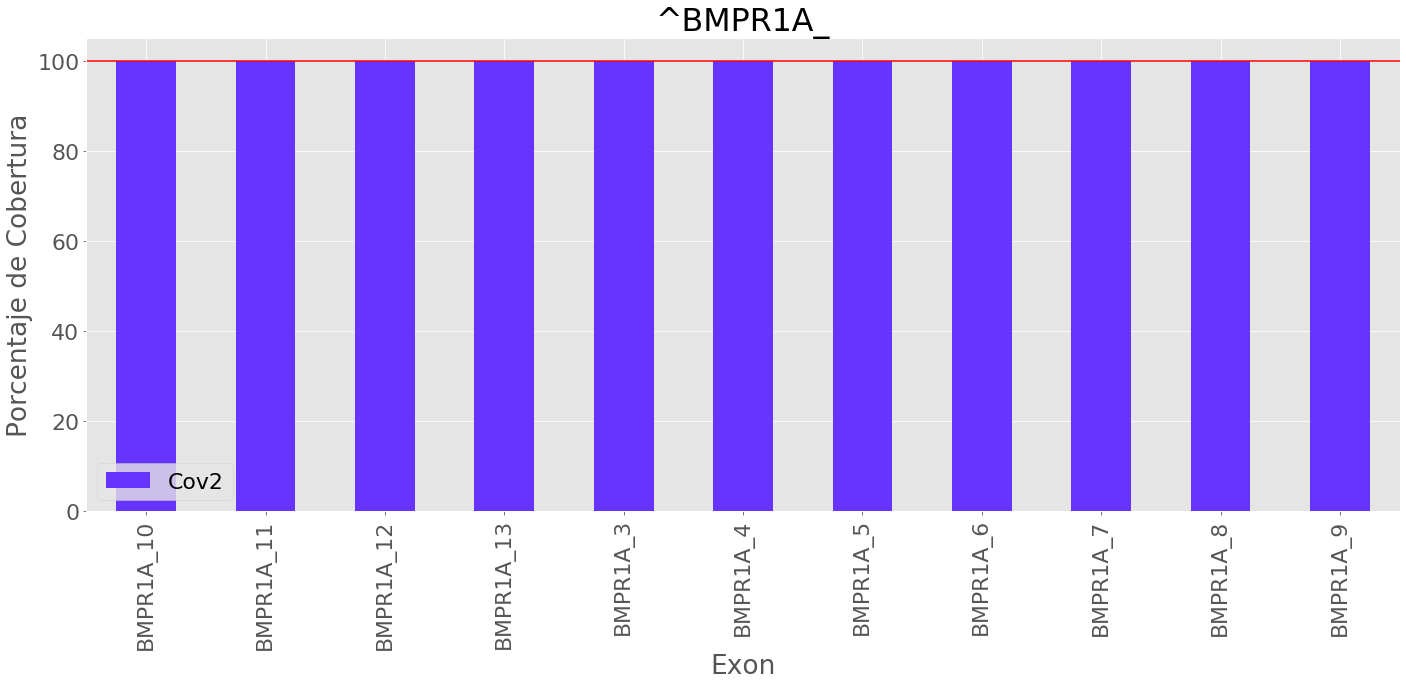

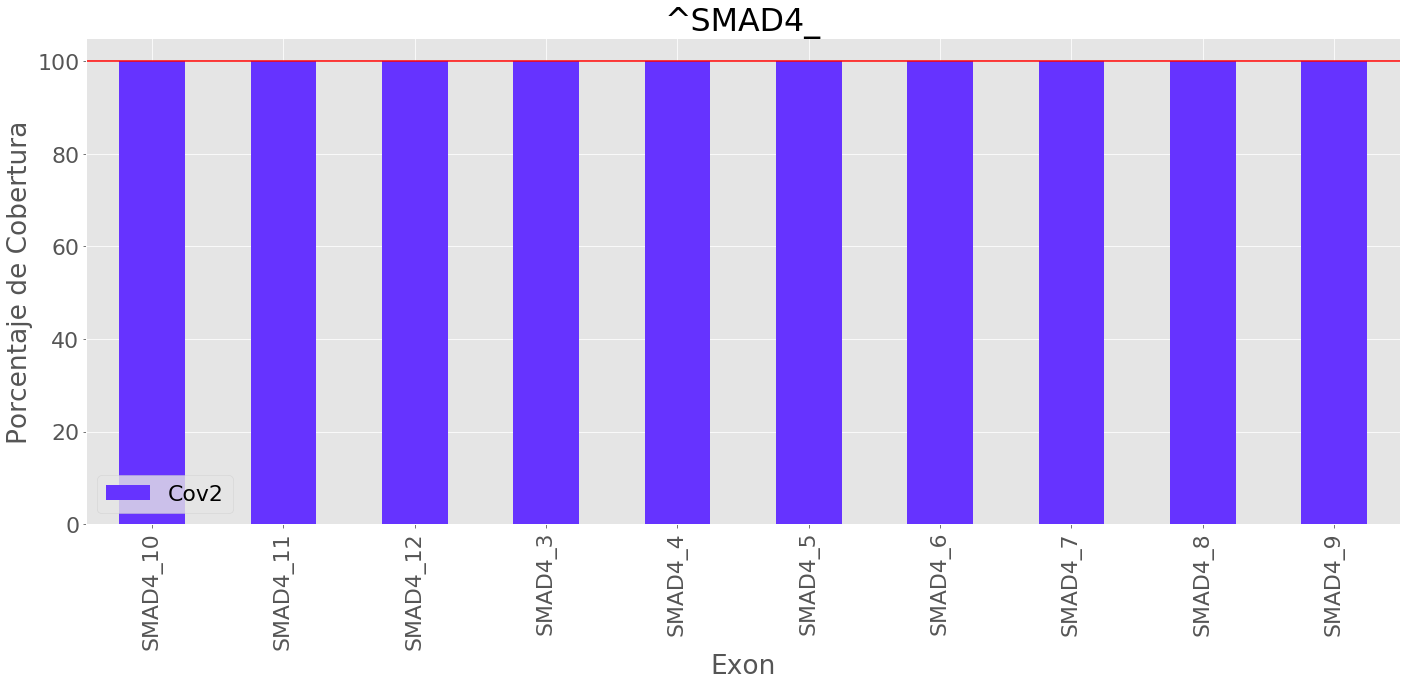

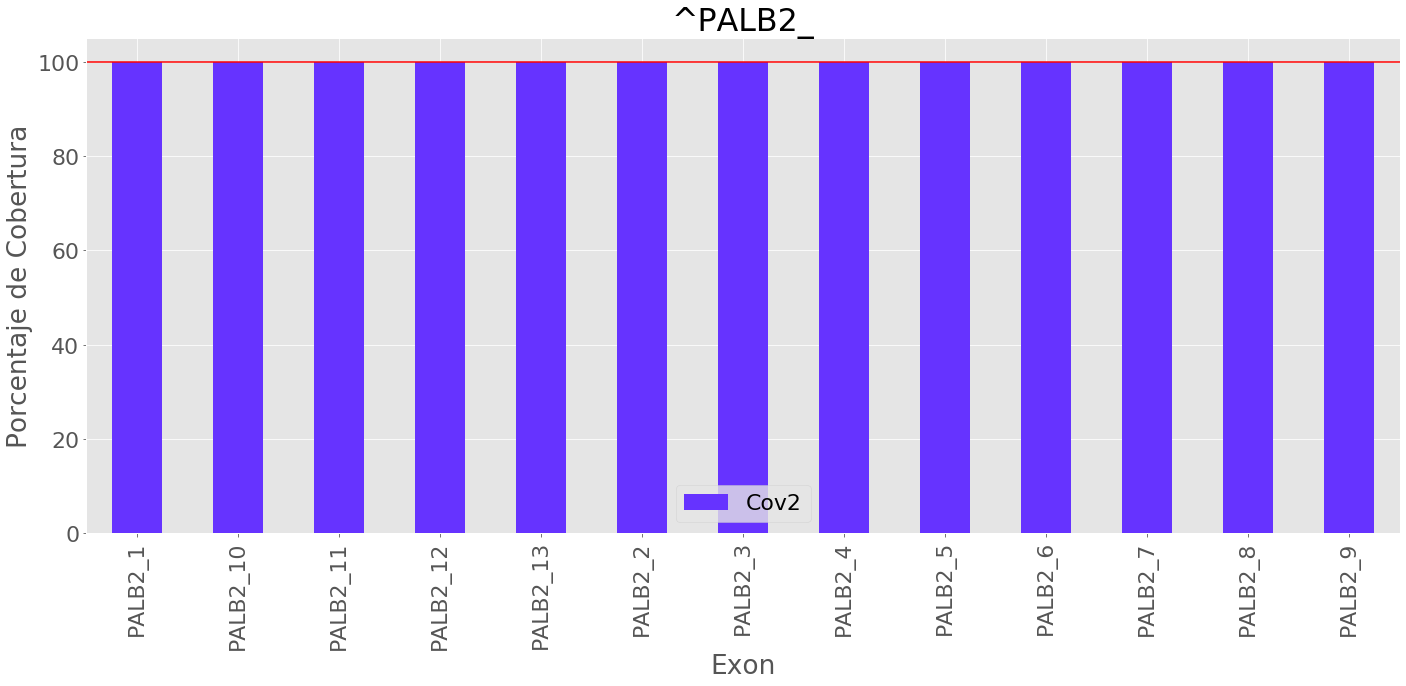

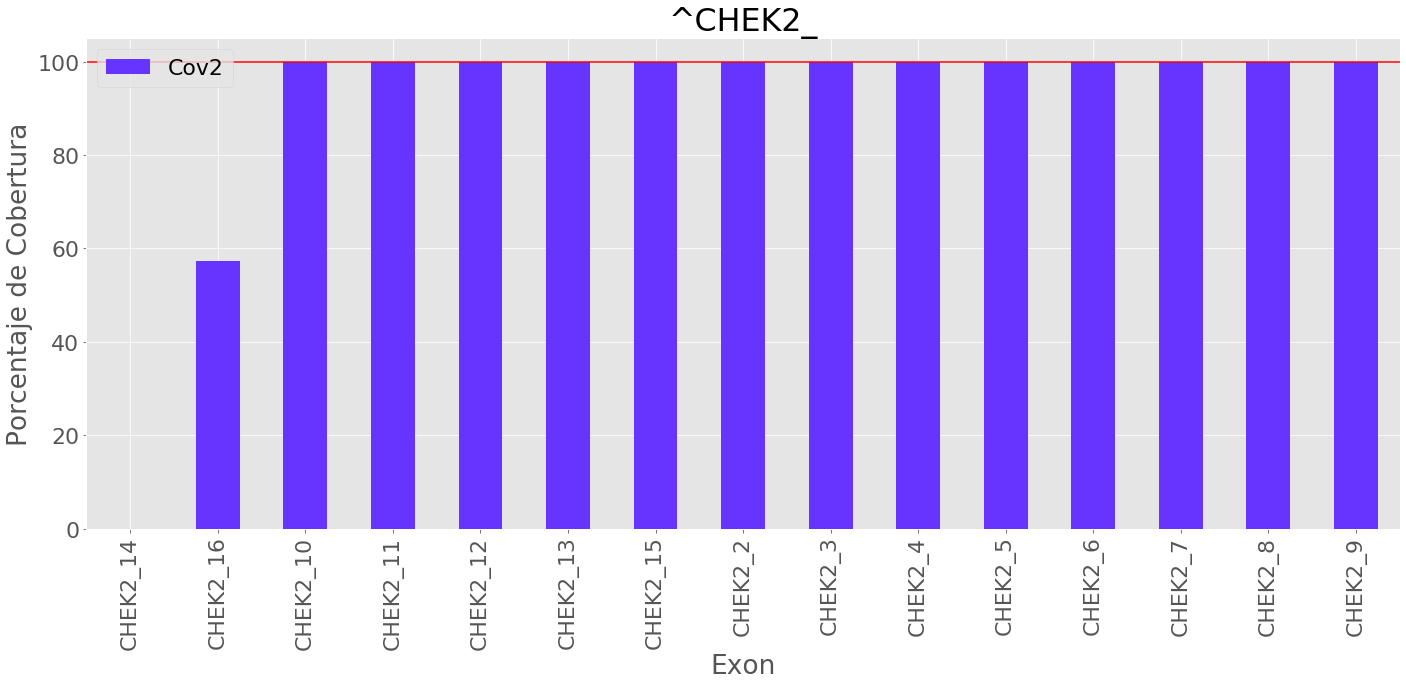

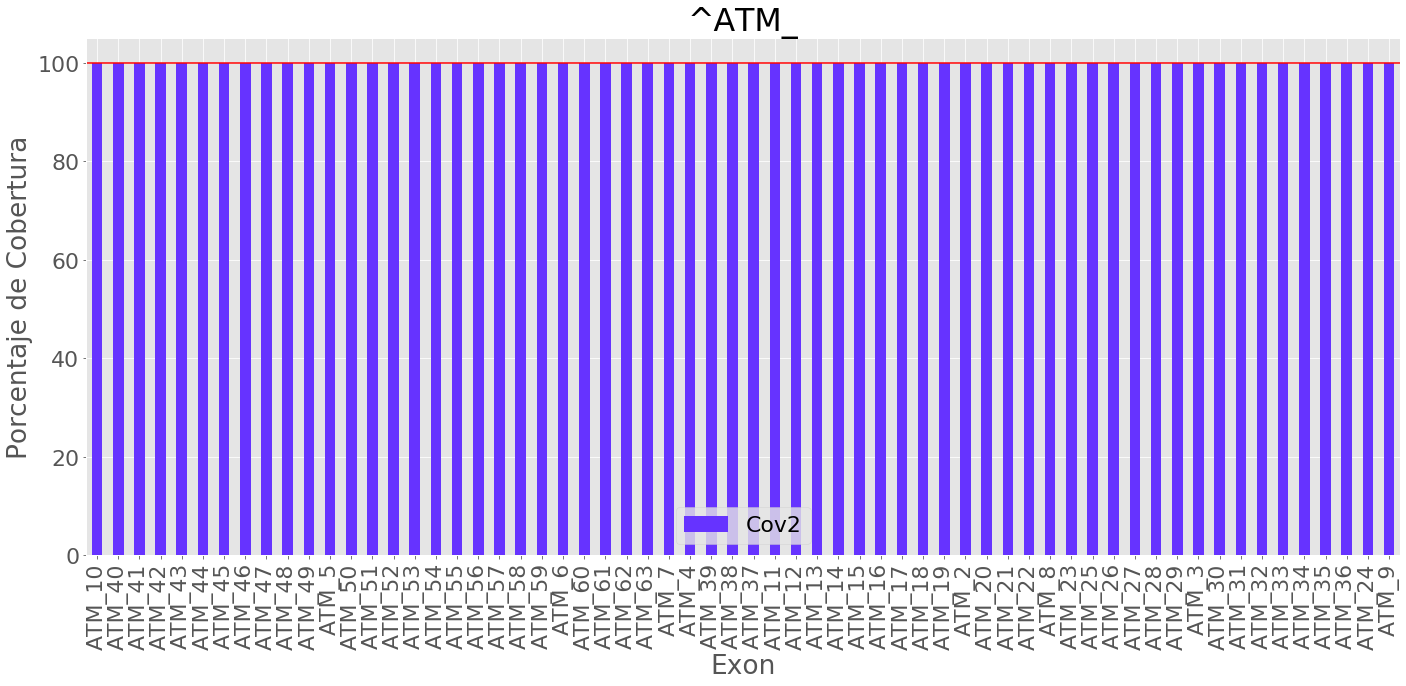

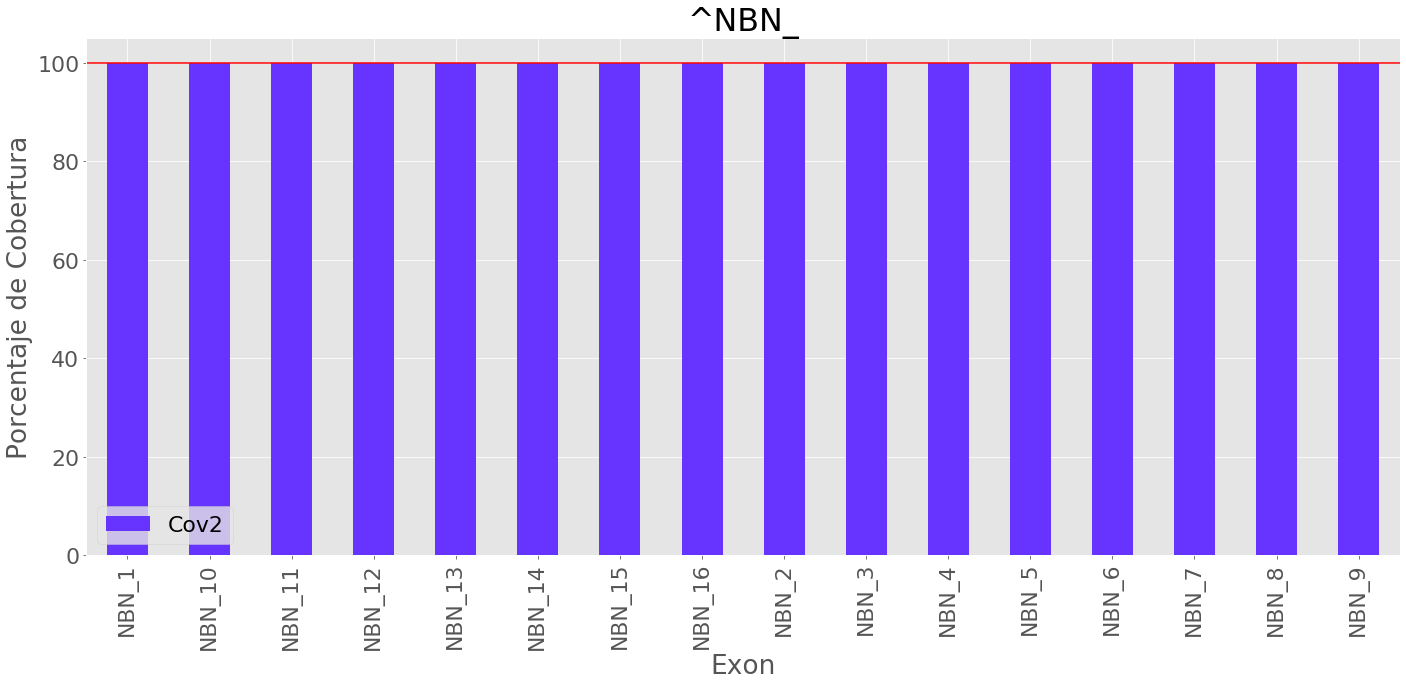

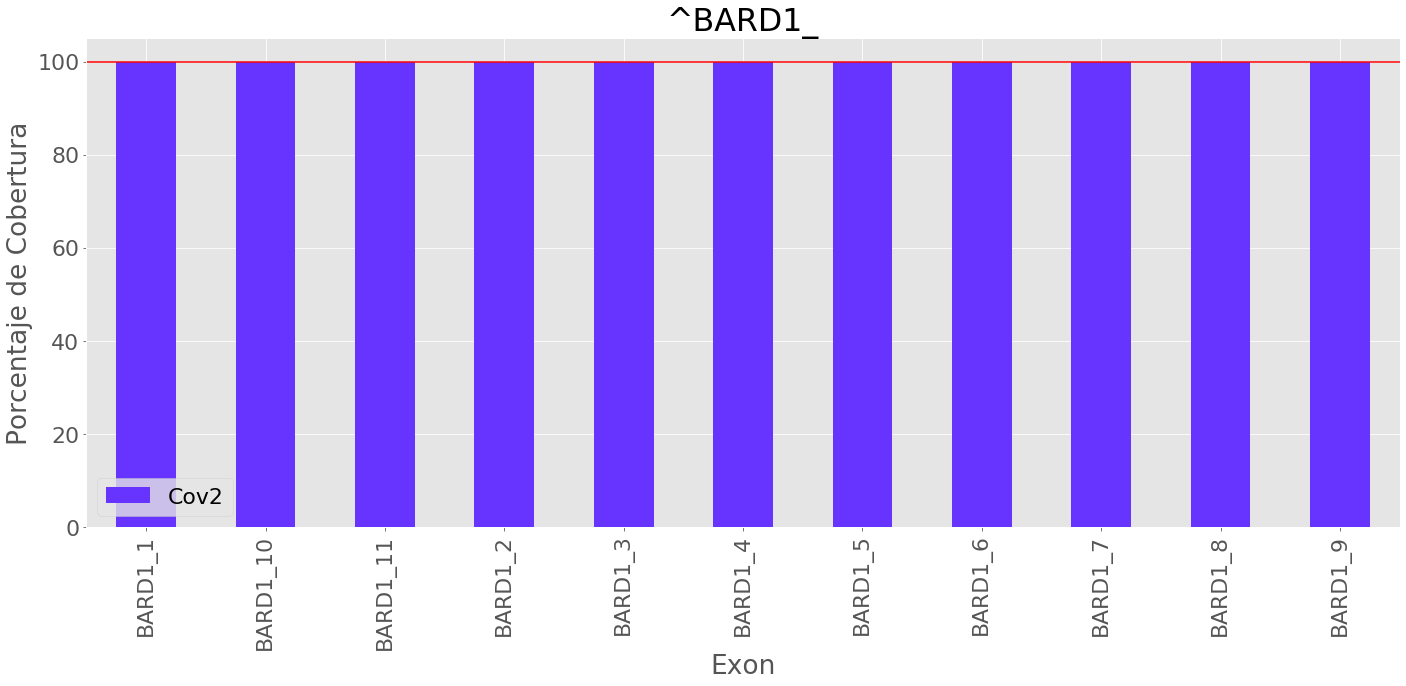

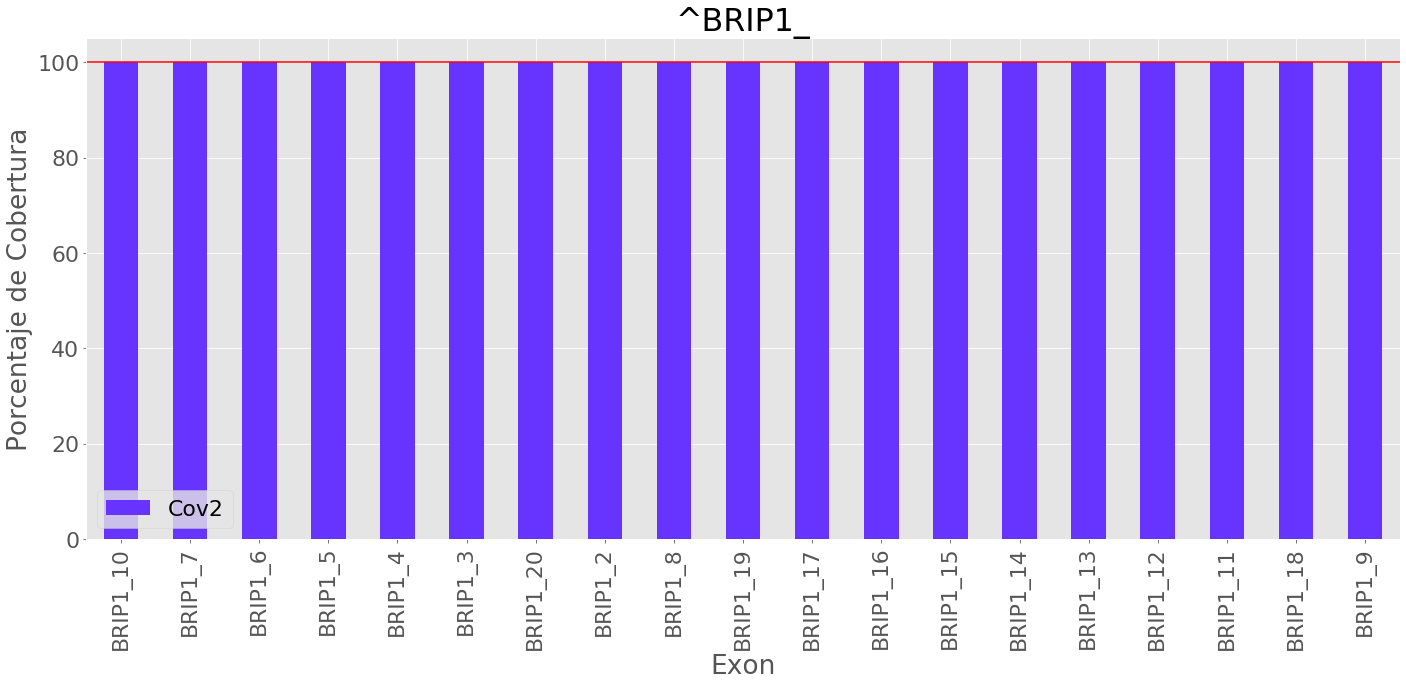

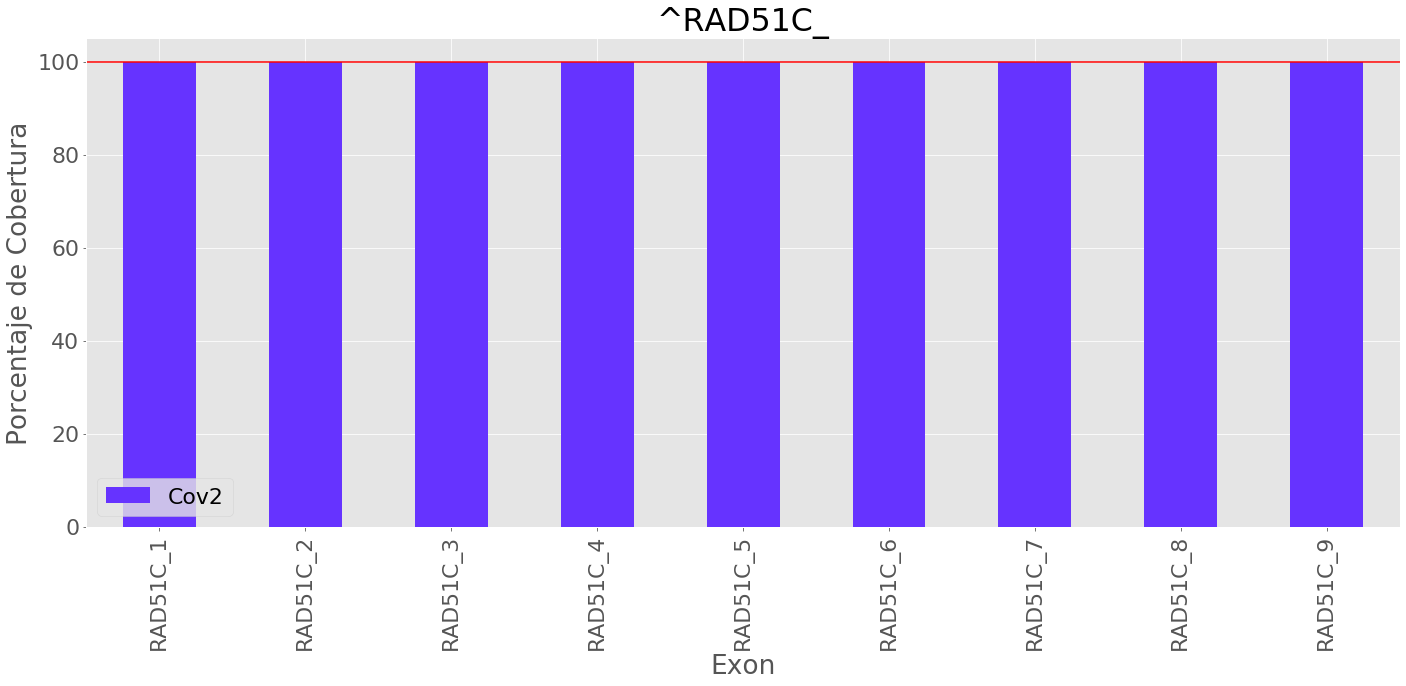

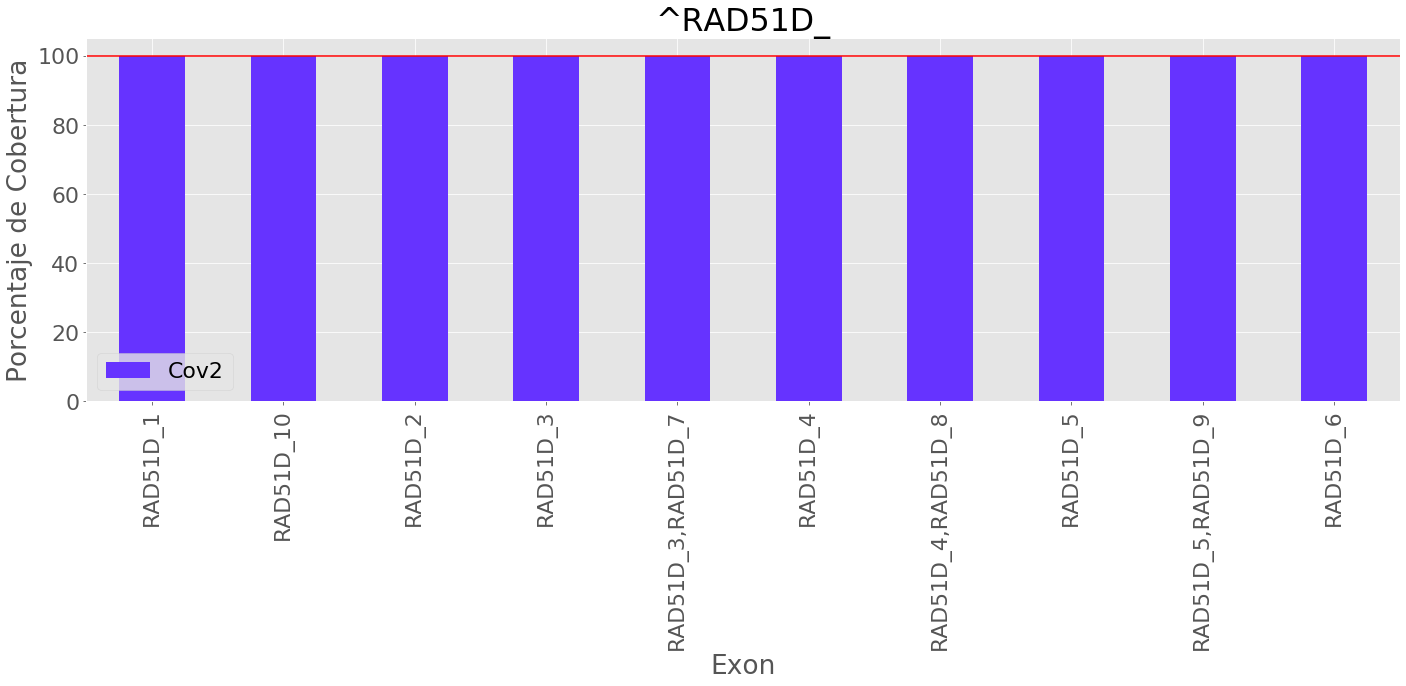

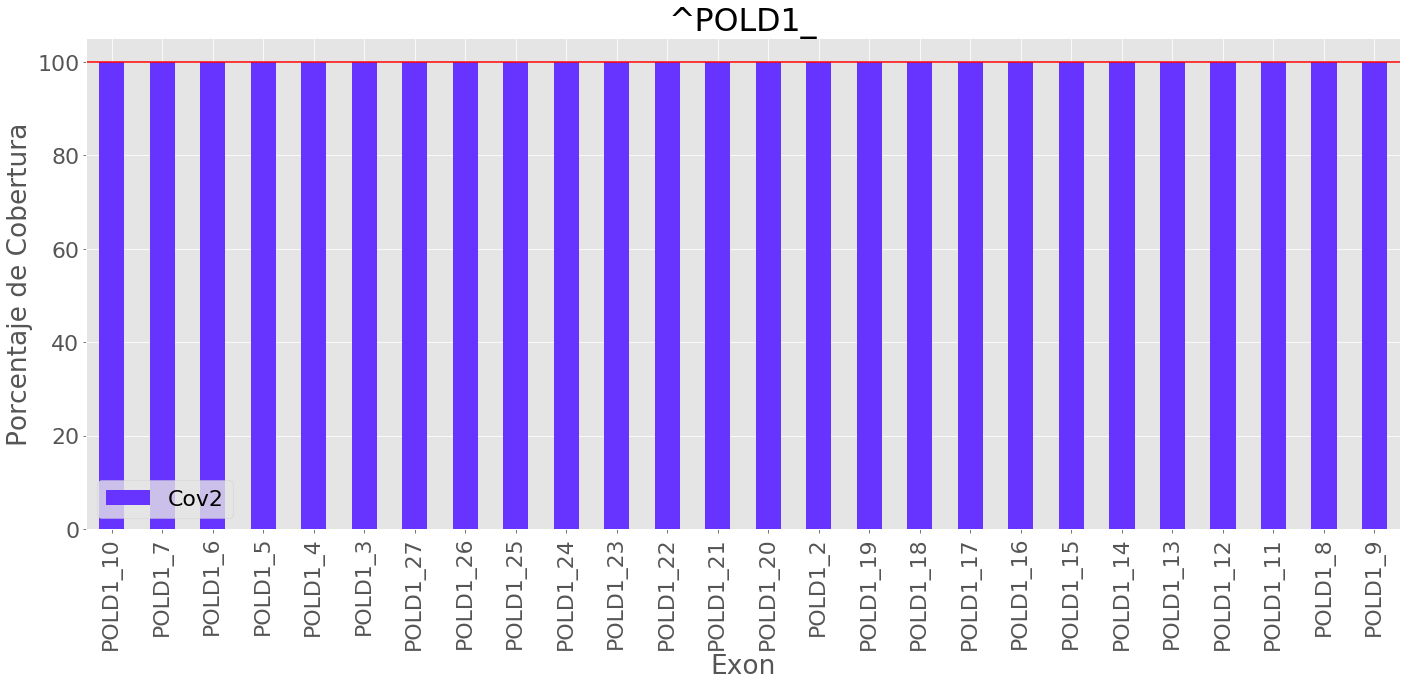

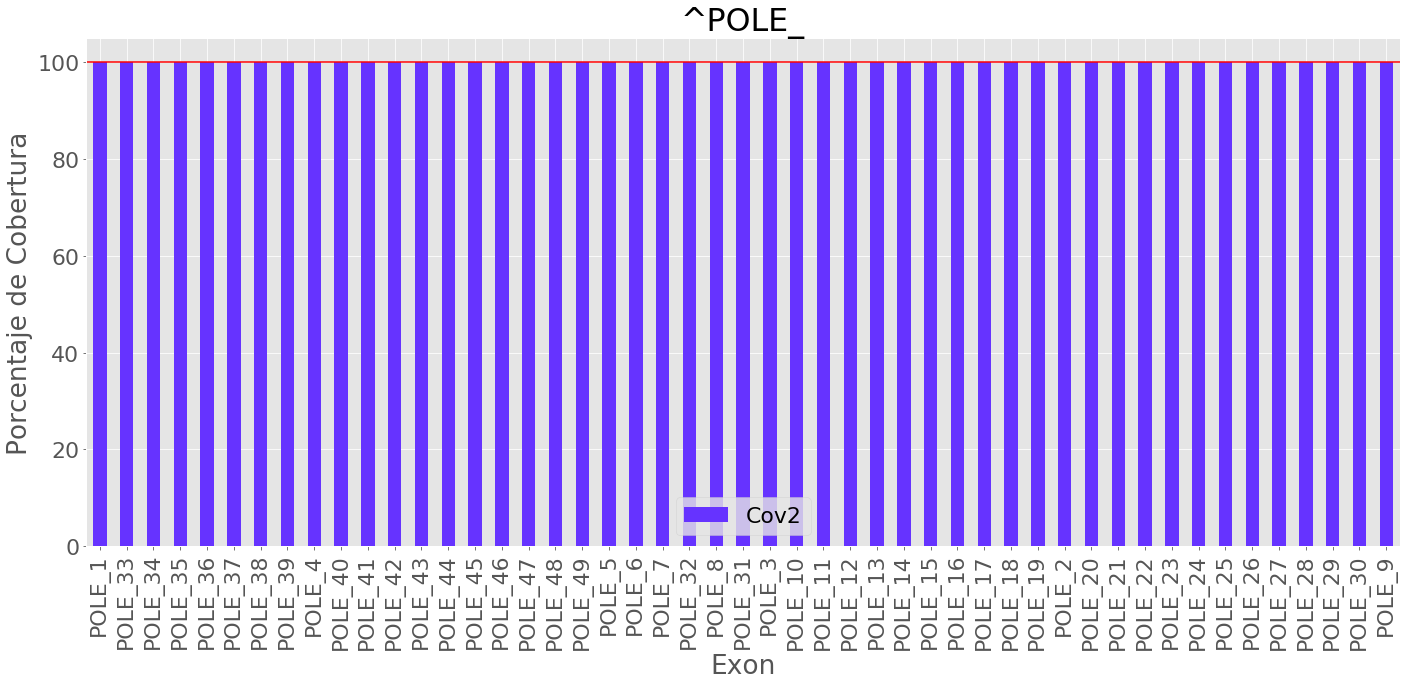

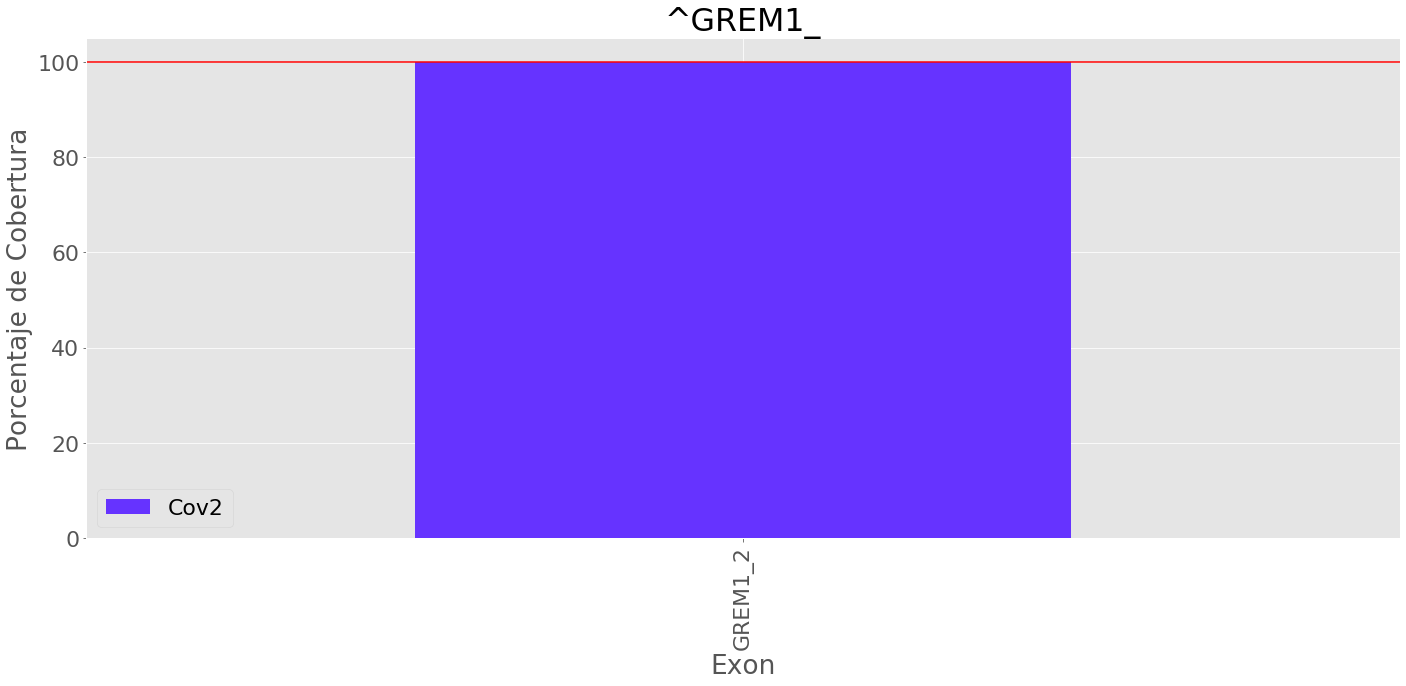

In [109]:
for g in g:
    porcentaje_cobertura(g)

In [ ]:
#%%bash
#find *.png*|wc -l 

In [ ]:
#%%bash
#rm *.png*

In [ ]:
len(g)

In [ ]:
n = input()                                

In [ ]:
j = grafico_media(n)

In [ ]:
r = porcentaje_cobertura(n)

In [124]:
exon = input()

 CHEK2_16


<Figure size 1440x720 with 0 Axes>

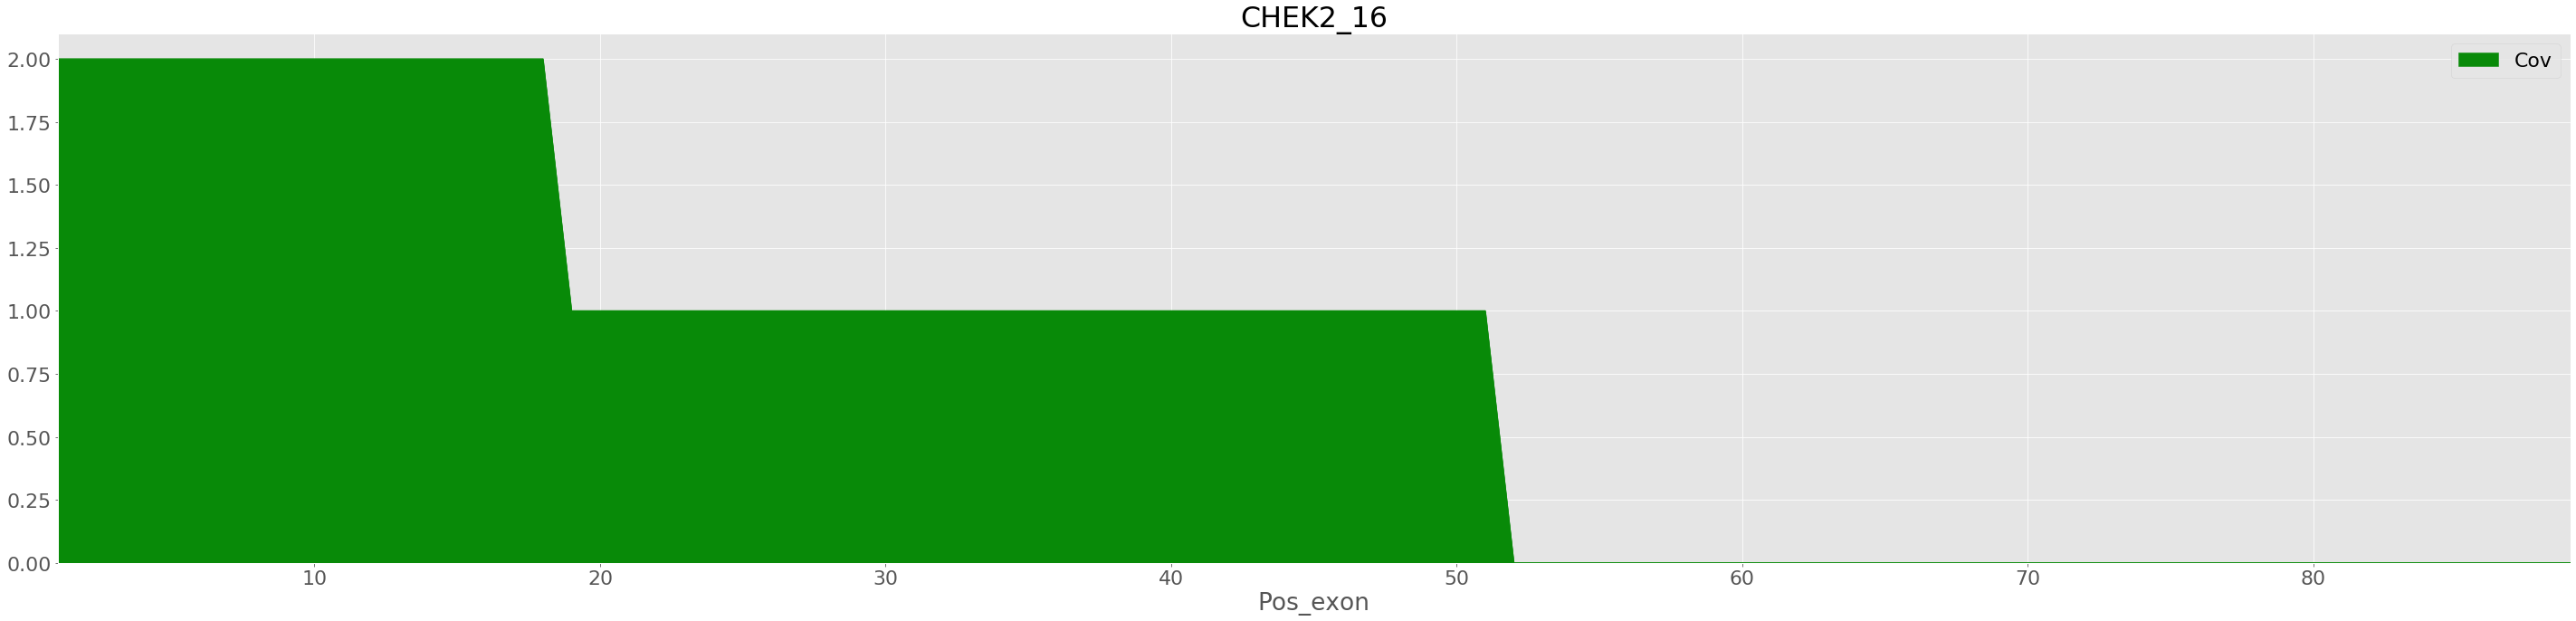

In [125]:
m = profundidad(exon)

In [126]:
%%bash
n=79710
convert /home/genetix/Escritorio/coberturas/${n}/*.png* /home/genetix/Escritorio/coberturas/${n}/IGV_${n}.pdf